# EasyVisa Project

## Context:

Business communities in the United States are facing high demand for human resources, but one of the constant challenges is identifying and attracting the right talent, which is perhaps the most important element in remaining competitive. Companies in the United States look for hard-working, talented, and qualified individuals both locally as well as abroad.

The Immigration and Nationality Act (INA) of the US permits foreign workers to come to the United States to work on either a temporary or permanent basis. The act also protects US workers against adverse impacts on their wages or working conditions by ensuring US employers' compliance with statutory requirements when they hire foreign workers to fill workforce shortages. The immigration programs are administered by the Office of Foreign Labor Certification (OFLC).

OFLC processes job certification applications for employers seeking to bring foreign workers into the United States and grants certifications in those cases where employers can demonstrate that there are not sufficient US workers available to perform the work at wages that meet or exceed the wage paid for the occupation in the area of intended employment.

## Objective:

In FY 2016, the OFLC processed 775,979 employer applications for 1,699,957 positions for temporary and permanent labor certifications. This was a nine percent increase in the overall number of processed applications from the previous year. The process of reviewing every case is becoming a tedious task as the number of applicants is increasing every year.

The increasing number of applicants every year calls for a Machine Learning based solution that can help in shortlisting the candidates having higher chances of VISA approval. OFLC has hired your firm EasyVisa for data-driven solutions. You as a data scientist have to analyze the data provided and, with the help of a classification model:

* Facilitate the process of visa approvals.
* Recommend a suitable profile for the applicants for whom the visa should be certified or denied based on the drivers that significantly influence the case status.


## Data Description

The data contains the different attributes of the employee and the employer. The detailed data dictionary is given below.

* case_id: ID of each visa application
* continent: Information of continent the employee
* education_of_employee: Information of education of the employee
* has_job_experience: Does the employee has any job experience? Y= Yes; N = No
* requires_job_training: Does the employee require any job training? Y = Yes; N = No
* no_of_employees: Number of employees in the employer's company
* yr_of_estab: Year in which the employer's company was established
* region_of_employment: Information of foreign worker's intended region of employment in the US.
* prevailing_wage:  Average wage paid to similarly employed workers in a specific occupation in the area of intended employment. The purpose of the prevailing wage is to ensure that the foreign worker is not underpaid compared to other workers offering the same or similar service in the same area of employment.
* unit_of_wage: Unit of prevailing wage. Values include Hourly, Weekly, Monthly, and Yearly.
* full_time_position: Is the position of work full-time? Y = Full Time Position; N = Part Time Position
* case_status:  Flag indicating if the Visa was certified or denied

## Importing necessary libraries and data

In [5]:
!pip install numpy==1.25.2 pandas==2.2.2 scikit-learn==1.3.1  matplotlib==3.8.0 seaborn==0.13.1 xgboost==2.0.3 statsmodels==0.14.1 -q --user

In [1]:
import warnings

warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Library to split data
from sklearn.model_selection import train_test_split

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 100)


# Libraries different ensemble classifiers
from sklearn.ensemble import (
    BaggingClassifier,
    RandomForestClassifier,
    AdaBoostClassifier,
    GradientBoostingClassifier,
    StackingClassifier,
)

# xgboost library
from xgboost import XGBClassifier

# Library to import decision tree classifier
from sklearn.tree import DecisionTreeClassifier

# Libraries to get different metric scores
from sklearn import metrics
from sklearn.metrics import (
    confusion_matrix,
    classification_report,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
)

# To tune different models
from sklearn.model_selection import GridSearchCV

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

## Reading the dataset

In [2]:
# Reading datasets provided by OFLC to EasyVisa by using read_csv from pandas package
easyvisa_main_df = pd.read_csv("/content/sample_data/EasyVisa.csv")

# copying data to another variable to avoid any changes to original data
easyvisa_copy_df = easyvisa_main_df.copy()

## Data Overview

The initial steps conducted to get an overview of any dataset is to:
- View the first few rows of the dataset, to check whether the dataset has been loaded properly or not
- Check the shape of the dataset to get information about the number of rows and columns in the dataset
- Obtain information about the data types of the columns to ensure that data is stored in the preferred format and the value of each property is as expected.
- Check the statistical summary of the dataset to get an overview of the numerical columns of the data


### Viewing the first and last few rows of the dataset

In [3]:
# Extracting first few rows of the dataset
easyvisa_copy_df.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [7]:
# Extracting last few rows of the dataset
easyvisa_copy_df.tail()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.57,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.79,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.85,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.77,Year,Y,Certified
25479,EZYV25480,Asia,Bachelor's,Y,N,3195,1960,Midwest,70876.91,Year,Y,Certified


**Observations**

* The dataset includes details about temporary and permanent labor certification applications for employers seeking to bring foreign workers into the United States , capturing different attributes that describe the characteristics of the employee and the employer, which includes applications that were certified and denied, providing valuable information for identifying trends and factors influencing certifications and denials.

* A preliminary look at the head and tail of the dataset suggests there are no missing values. However, to confirm the dataset is complete across all rows and columns, a full check for missing values will be performed  to ensure data quality.

### Understanding the shape of the dataset.

In [4]:
easyvisa_copy_df.shape

(25480, 12)

**Observations**

* The dataset has 25480 rows and 12 columns of data

### Check the data types of the columns for the dataset.

In [5]:
easyvisa_copy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


**Observations**

* There are no null values in the dataset.
* There are 3 numerical columns ( 2 Integer and 1 Float ) and 9 object type columns.
* The target variable is the `case_status` of each job certification application, which is of object type column
* We can convert the object type columns to categories.

`converting "objects" to "category" reduces the data space required to store the dataframe`

### Fixing the data types

In [4]:
cols = easyvisa_copy_df.select_dtypes(['object'])
cols.columns

Index(['case_id', 'continent', 'education_of_employee', 'has_job_experience',
       'requires_job_training', 'region_of_employment', 'unit_of_wage',
       'full_time_position', 'case_status'],
      dtype='object')

In [4]:
for i in cols.columns:
    easyvisa_copy_df[i] = easyvisa_copy_df[i].astype('category')

In [5]:
easyvisa_copy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   case_id                25480 non-null  category
 1   continent              25480 non-null  category
 2   education_of_employee  25480 non-null  category
 3   has_job_experience     25480 non-null  category
 4   requires_job_training  25480 non-null  category
 5   no_of_employees        25480 non-null  int64   
 6   yr_of_estab            25480 non-null  int64   
 7   region_of_employment   25480 non-null  category
 8   prevailing_wage        25480 non-null  float64 
 9   unit_of_wage           25480 non-null  category
 10  full_time_position     25480 non-null  category
 11  case_status            25480 non-null  category
dtypes: category(9), float64(1), int64(2)
memory usage: 2.0 MB


`we can see that the memory usage has decreased from 2.3+ MB to 2.0 MB, this technique is generally useful for bigger datasets.`

### Checking Statistical Summary of the dataset

In [9]:
easyvisa_copy_df.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_employees,25480.0,5667.043210,22877.928848,-26.0000,1022.00,2109.00,3504.0000,602069.00
yr_of_estab,25480.0,1979.409929,42.366929,1800.0000,1976.00,1997.00,2005.0000,2016.00
prevailing_wage,25480.0,74455.814592,52815.942327,2.1367,34015.48,70308.21,107735.5125,319210.27


**Observations**

1. `no_of_employees`:

    * The dataset includes companies with a wide range of employee counts, from -26 (invalid value) to a maximum of 602,069 employees.
    * 75% of companies have 3,504 employees or fewer, while the median is 2,109.
    * The mean is 5,667, but a high standard deviation indicates extreme variability and possible outliers.

2. `yr_of_estab`:

   *  Most companies were established between 1976 and 2005, with a median establishment year of 1997.
   * The average year of establishment is 1979, with recent companies going up to 2016.

3. `prevailing_wage`:

    * The average wage offered is approximately $74,455, with most wages falling between $34,015 (25th percentile) and $107,735 (75th percentile).
    * The median wage is $70,308, and the mean is higher, indicating a right-skewed distribution caused by a few high wage values.
    * The minimum wage of $2.14 likely represents hourly wages, as indicated by the unit_of_wage column. The wide range of values reflects different pay intervals (hourly, weekly, monthly, yearly).

In [10]:
easyvisa_copy_df.describe(include=['category']).T

,count,unique,top,freq
case_id,25480,25480,EZYV01,1
continent,25480,6,Asia,16861
education_of_employee,25480,4,Bachelor's,10234
has_job_experience,25480,2,Y,14802
requires_job_training,25480,2,N,22525
region_of_employment,25480,5,Northeast,7195
unit_of_wage,25480,4,Year,22962
full_time_position,25480,2,Y,22773
case_status,25480,2,Certified,17018


**Observations**

1. `case_id`: 25,480 unique IDs, each record has a unique identifier. It is an ID variable and not useful for predictive modelling
2. `continent`: 6 unique values, most common is Asia with 16,861 entries.
3. `education_of_employee`: 4 unique values, most common is Bachelor's with 10,234 entries.
4. `has_job_experience`: 2 unique values (Y/N), most common is Y (Yes) with 14,802 entries.
5. `requires_job_training`: 2 unique values (Y/N), most common is N (No) with 22,525 entries.
6. `region_of_employment`: 5 unique values, most common is Northeast with 7,195 entries.
7. `unit_of_wage`: 4 unique values (Hourly, Weekly, Monthly, Yearly), most common is Year with 22,962 entries.
8. `full_time_position`: 2 unique values (Y/N), most common is Y (Yes) with 22,773 entries.
9. `case_status`: 2 unique values (Certified/Denied), most common is Certified with 17,018 entries.

**Summary Insight**

* The dataset contains mostly unique case_id values, confirming no duplicates.
* Most applications are from Asia (66.2%) and involve candidates with a Bachelor's degree.
* A significant majority of jobs are full-time (Y), and most do not require additional training (N).
* Most jobs offer Yearly wages, and the Certified case status is dominant.

### Checking for Missing Values and Duplicates

In [63]:
print(easyvisa_main_df.isnull().sum())

case_id                  0
continent                0
education_of_employee    0
has_job_experience       0
requires_job_training    0
no_of_employees          0
yr_of_estab              0
region_of_employment     0
prevailing_wage          0
unit_of_wage             0
full_time_position       0
case_status              0
dtype: int64


In [64]:
easyvisa_main_df.duplicated().sum()

0

**Observations**

* There are no missing values and duplicates

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Leading Questions**:
1. Those with higher education may want to travel abroad for a well-paid job. Does education play a role in Visa certification?

2. How does the visa status vary across different continents?

3. Experienced professionals might look abroad for opportunities to improve their lifestyles and career development. Does work experience influence visa status?

4. In the United States, employees are paid at different intervals. Which pay unit is most likely to be certified for a visa?

5. The US government has established a prevailing wage to protect local talent and foreign workers. How does the visa status change with the prevailing wage?

### Checking the Categorical variables

In [6]:
# Looking at the unique values of all the categories
cols_cat= easyvisa_copy_df.select_dtypes(['category'])
for i in cols_cat.columns:
    print('Unique values in',i, 'are :')
    print(cols_cat[i].value_counts())
    print('*'*50)

Unique values in case_id are :
case_id
EZYV01       1
EZYV25287    1
EZYV25285    1
EZYV25284    1
EZYV25283    1
            ..
EZYV17633    1
EZYV17632    1
EZYV17631    1
EZYV17630    1
EZYV9999     1
Name: count, Length: 25480, dtype: int64
**************************************************
Unique values in continent are :
continent
Asia             16861
Europe            3732
North America     3292
South America      852
Africa             551
Oceania            192
Name: count, dtype: int64
**************************************************
Unique values in education_of_employee are :
education_of_employee
Bachelor's     10234
Master's        9634
High School     3420
Doctorate       2192
Name: count, dtype: int64
**************************************************
Unique values in has_job_experience are :
has_job_experience
Y    14802
N    10678
Name: count, dtype: int64
**************************************************
Unique values in requires_job_training are :
requires_job_

**Observations**

1. continent: Asia leads with 16,861 entries, whereas Oceania has the fewest at 192.
2. education_of_employee: Bachelor's is the most frequent education level (10,234), compared to Doctorate, which has only 2,192 entries.
3. has_job_experience: A majority of applicants have job experience (Y: 14,802), while those without experience are fewer (N: 10,678).
4. requires_job_training: Most positions don’t require training (N: 22,525), with only 2,955 needing it (Y).
5. region_of_employment: The Northeast dominates employment regions (7,195), while Island positions are the least common (375).
6. unit_of_wage: Yearly wages are overwhelmingly common (22,962), while monthly wages are rare (89).
7. full_time_position: Full-time roles are dominant (Y: 22,773), leaving part-time positions in the minority (N: 2,707).
8. case_status: Certified applications are the majority (17,018), while Denied ones make up 8,462 entries.


In [7]:
# Show class distribution for 'case_status'
easyvisa_copy_df['case_status'].value_counts(1)

,proportion
case_status,
Certified,0.667896
Denied,0.332104


**Observations**

* The dependent variable, `case_status`, shows a moderately imbalanced distribution, with Certified accounting for 66.79% of the cases and Denied making up 33.21%.
* The Certified class is approximately twice as frequent as the Denied class, indicating a noticeable imbalance in the data.
* Given this moderate imbalance, adjusting class weights during modeling can help ensure better representation of the minority class (Denied).

### Checking Uniqueness Using Case id

In [12]:
# checking the number of unique values
easyvisa_copy_df["case_id"].nunique()

25480

* **There are 25,480 cases**
* **Since all the values in Case id column are unique we can drop it**


### Data Cleanup

**Dropping columns which are not adding any information.**

In [5]:
easyvisa_copy_df.drop(['case_id'],axis=1,inplace=True)

**Fixing the negative values in number of employees columns**

In [6]:
# Count negative values before conversion
negative_count_before = easyvisa_copy_df.loc[easyvisa_copy_df['no_of_employees'] < 0].shape[0]
print(f"Count of records with negative employee values before conversion: {negative_count_before}")

# Convert negative values to absolute using np.abs
easyvisa_copy_df['no_of_employees'] = np.abs(easyvisa_copy_df['no_of_employees'])

# Count negative values after conversion
negative_count_after = easyvisa_copy_df.loc[easyvisa_copy_df['no_of_employees'] < 0].shape[0]
print(f"Count of records with negative employee values after conversion: {negative_count_after}")

Count of records with negative employee values before conversion: 33
Count of records with negative employee values after conversion: 0


### Functions defined to carry out the EDA

In [10]:
# FUnction to create Boxplot and histogram
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [11]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [12]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

In [13]:
# function to plot stacked bar chart


def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 6))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [19]:
# Function to create boxplot outlier detection
def fn_boxplot(data, xvariable , yvariable ,plt_title=None):

  # Set the figure size for the entire plot
  plt.figure(figsize=(10, 6))

  # Create a boxplot to visualize the distribution
  sns.boxplot(data=data, x=xvariable, y=yvariable , showmeans=True)

  if not plt_title is None:
    plt.title(plt_title)

  # Rotate the x-axis labels by 90 degrees for better readability
  plt.xticks(rotation=90)

  # show the plot
  plt.show()

### Univariate Analysis

#### Observations on number of employees

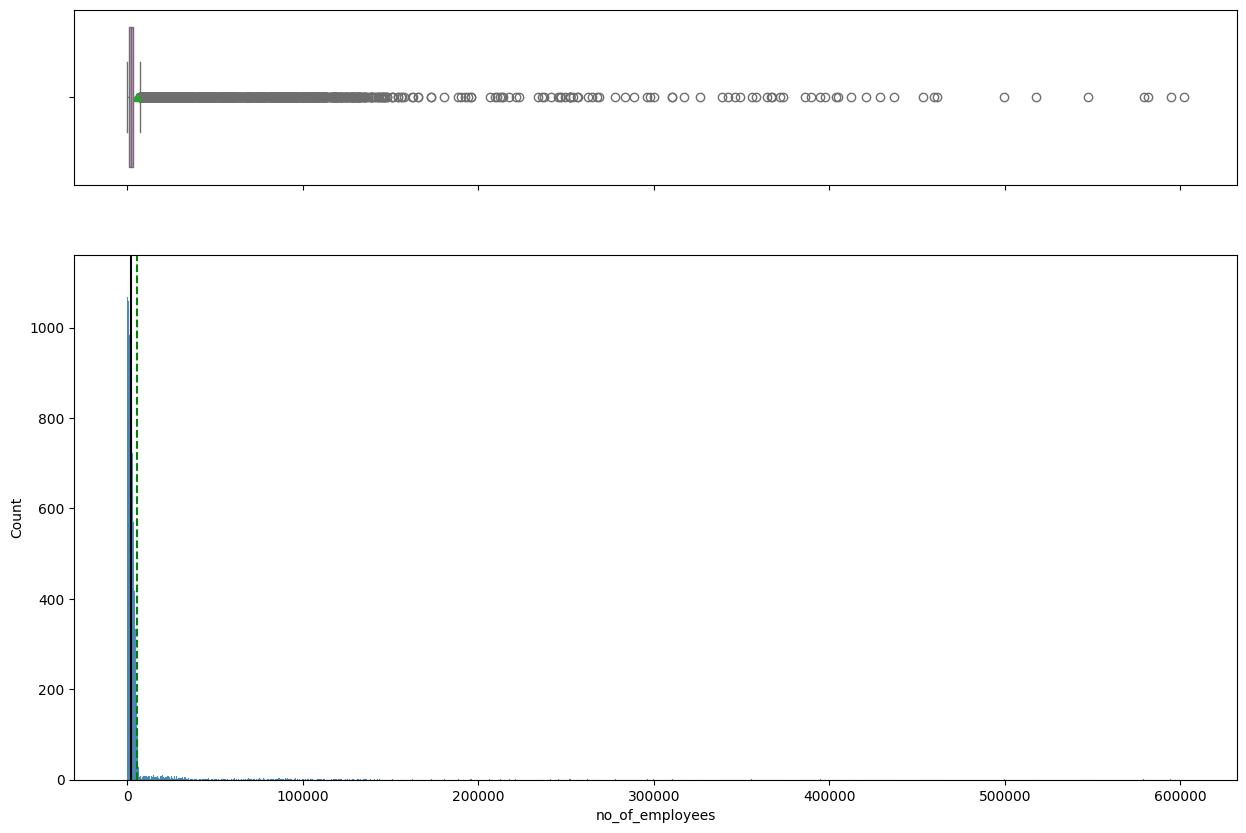

In [35]:
histogram_boxplot(easyvisa_copy_df, "no_of_employees")

**Observations**

1. Most companies have a small number of employees, as shown by the narrow range of the box in the boxplot near the lower end.
2. The boxplot reveals extreme outliers, with employee counts exceeding 100,000 and some extending beyond 400,000.
3. The upper whisker is short compared to the range of outliers, highlighting a significant gap between typical values and the extreme cases.
4. The distribution is heavily right-skewed, with the majority of data concentrated near the lower quartiles and a few companies accounting for very high employee counts.
5. The concentration of data near the lower quartiles is consistent with the right-skewed distribution seen in the histogram.

#### Observations on prevailing wage



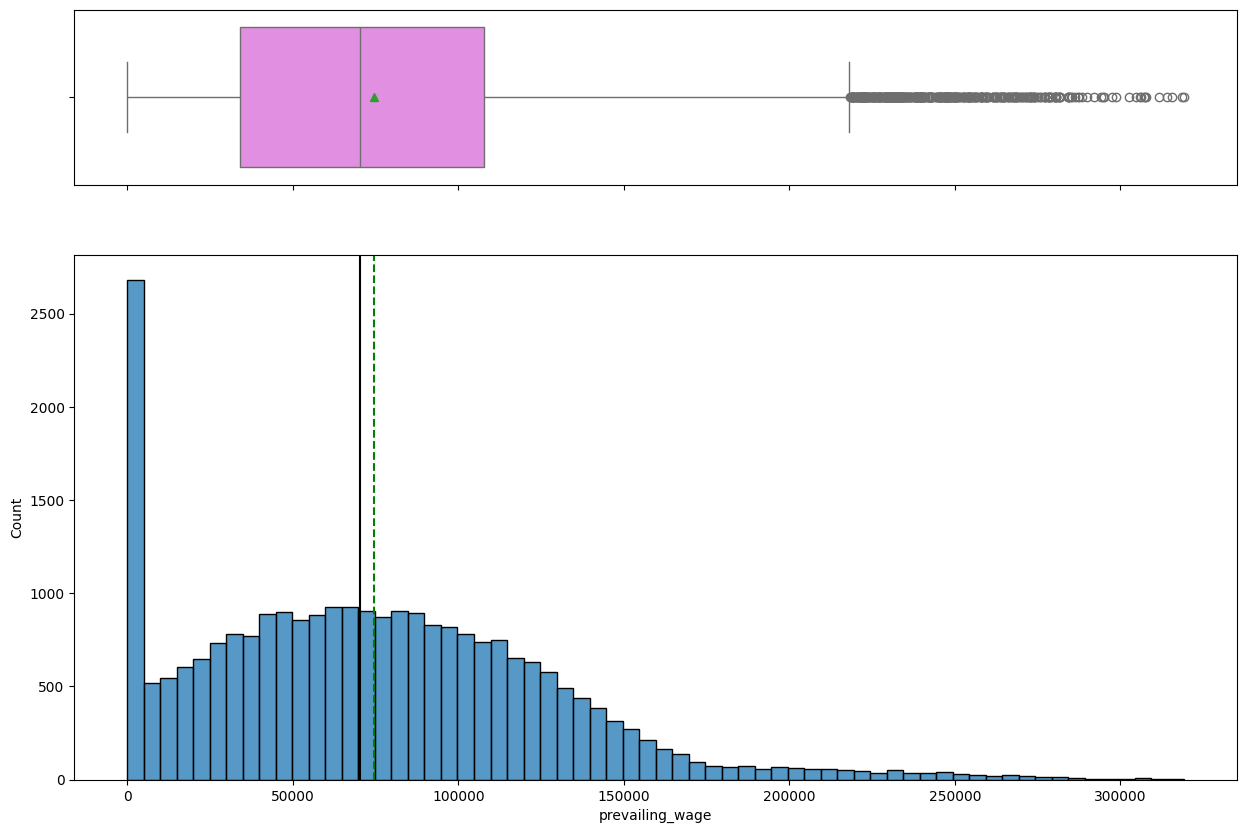

In [41]:
histogram_boxplot(easyvisa_copy_df, "prevailing_wage")

**Observations**

1. The prevailing_wage feature represents wages offered for certified jobs and includes different unit categories such as hourly, weekly, monthly, and yearly wages.

2. The histogram is right-skewed, with most wages concentrated near \$0, likely due to hourly or weekly wage records, and a some high-paying roles contributing to the tail of the distribution.

3. The boxplot shows outliers beginning between \$200,000 and \$250,000 and extending to a maximum of approximately \$300,000. These likely correspond to specialized or high-paying roles, predominantly associated with yearly wage categories.

4. Interpretation of the prevailing wage as a single feature without separating by unit_of_wage could lead to misleading conclusions; splitting the data by wage unit is essential for meaningful analysis

**Separating observations of prevailing_wage by the categories in unit_of_wage to better understand the distribution of data within each wage scale (Year, Month, Week, Hour). This ensures that comparisons are meaningful since the scales differ significantly across wage units**

**Yearly**

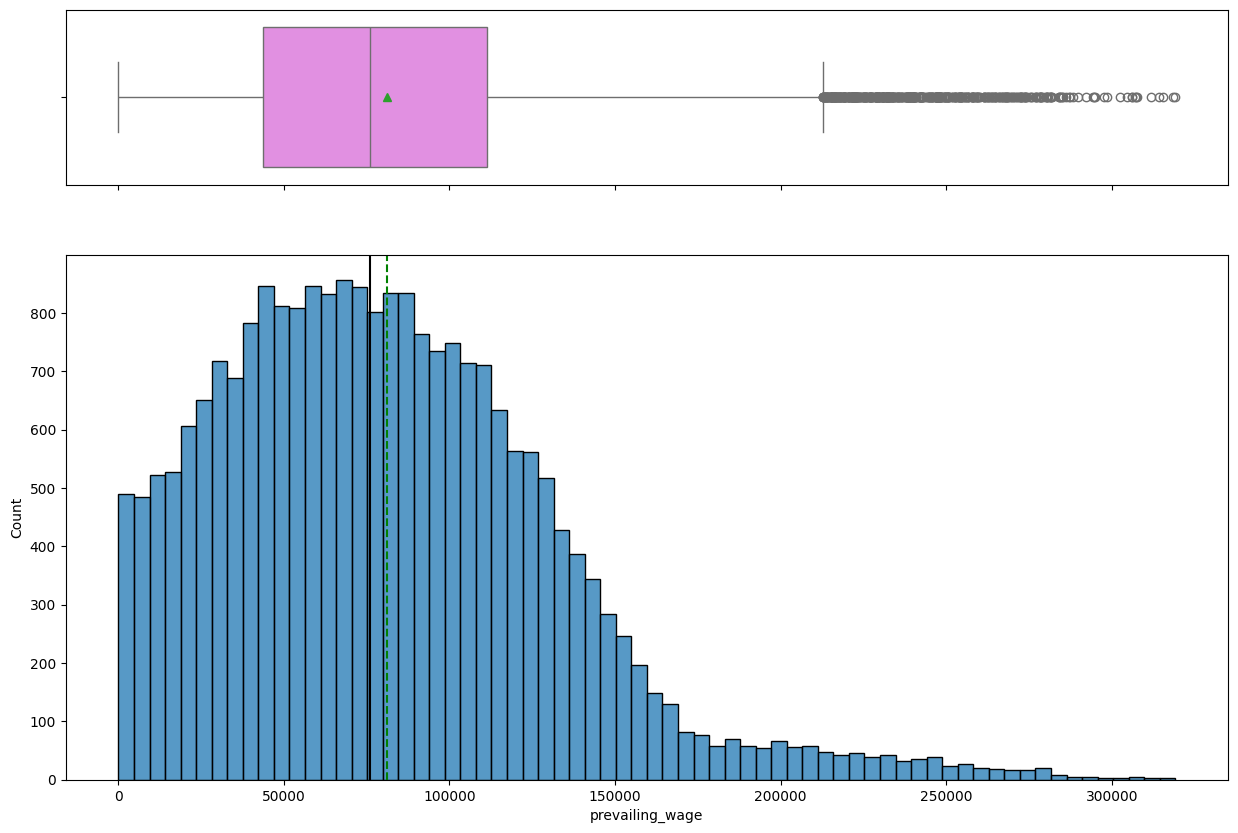

In [36]:
# Filter the DataFrame to include only rows where 'unit_of_wage' is 'Year'
prevailing_wage_year_df =  easyvisa_copy_df.loc[easyvisa_copy_df["unit_of_wage"] == "Year"]

# Visualize the distribution of 'prevailing_wage' for the filtered DataFrame
histogram_boxplot(prevailing_wage_year_df, "prevailing_wage")

**Observations**

1. The histogram for yearly wages is right-skewed, with most certified job offers concentrated between \$40,000 and \$120,000, and fewer high-paying roles extending the tail.
2. The boxplot reveals outliers beyond $200,000, extending up to the maximum of \$300,000, representing high-paying specialized roles.
3. The interquartile range (IQR) shows moderate variability, with the majority of wages falling within the \$40,000 to \$120,000 range, reflecting a focus on mid-range salaries.

**Monthly**

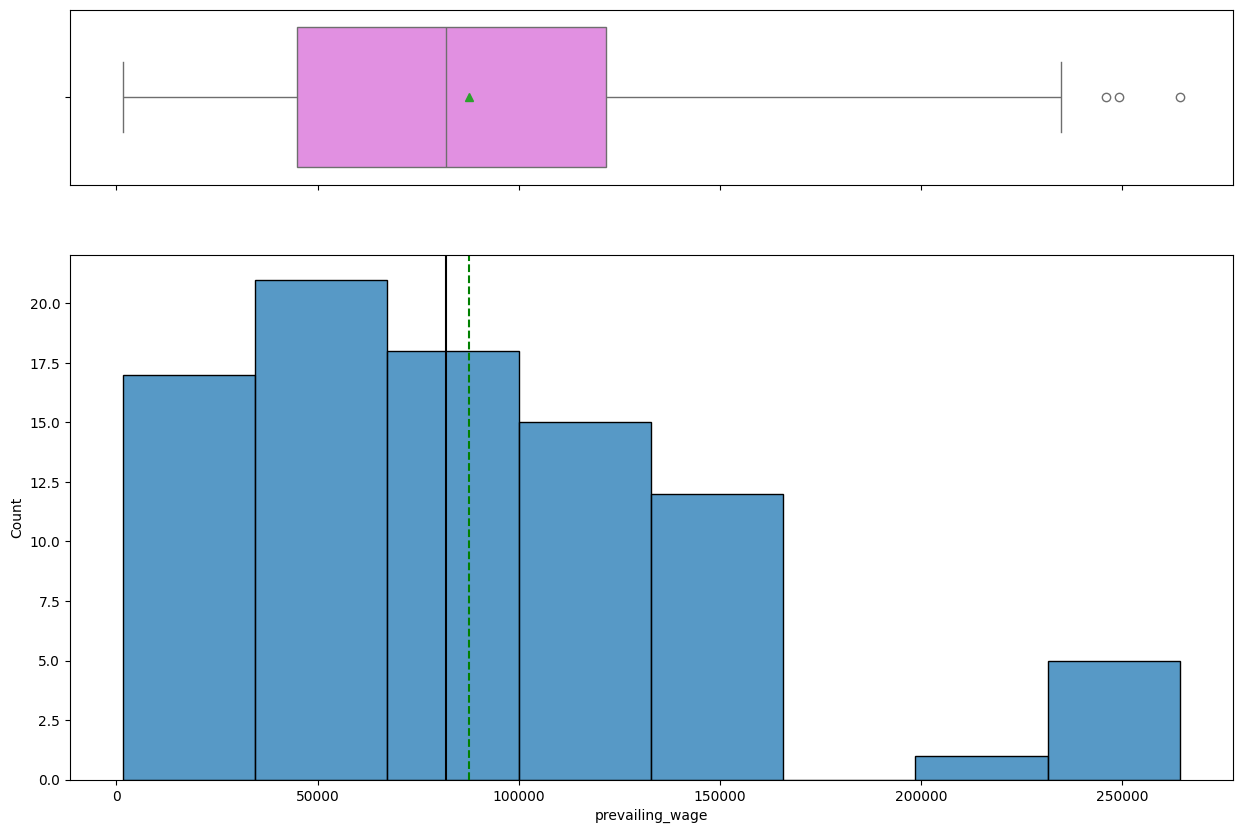

In [20]:
# Filter the DataFrame to include only rows where 'unit_of_wage' is 'Year'
prevailing_wage_month_df =  easyvisa_copy_df.loc[easyvisa_copy_df["unit_of_wage"] == "Month"]

# Visualize the distribution of 'prevailing_wage' for the filtered DataFrame
histogram_boxplot(prevailing_wage_month_df, "prevailing_wage")

**Observations**

1. The monthly wages exhibit a relatively uniform distribution between \$0 and \$150,000, with the majority concentrated within this range. The mean and median are fairly aligned, indicating a near-symmetric distribution.

2. Outliers are present, starting around 200,000 and extending to approximately \$250,000, which likely represent high-paying or specialized roles.

3. The boxplot suggests that the majority of monthly wages fall within a reasonable range, with a small proportion of outliers significantly deviating from the main distribution.



**Weekly**

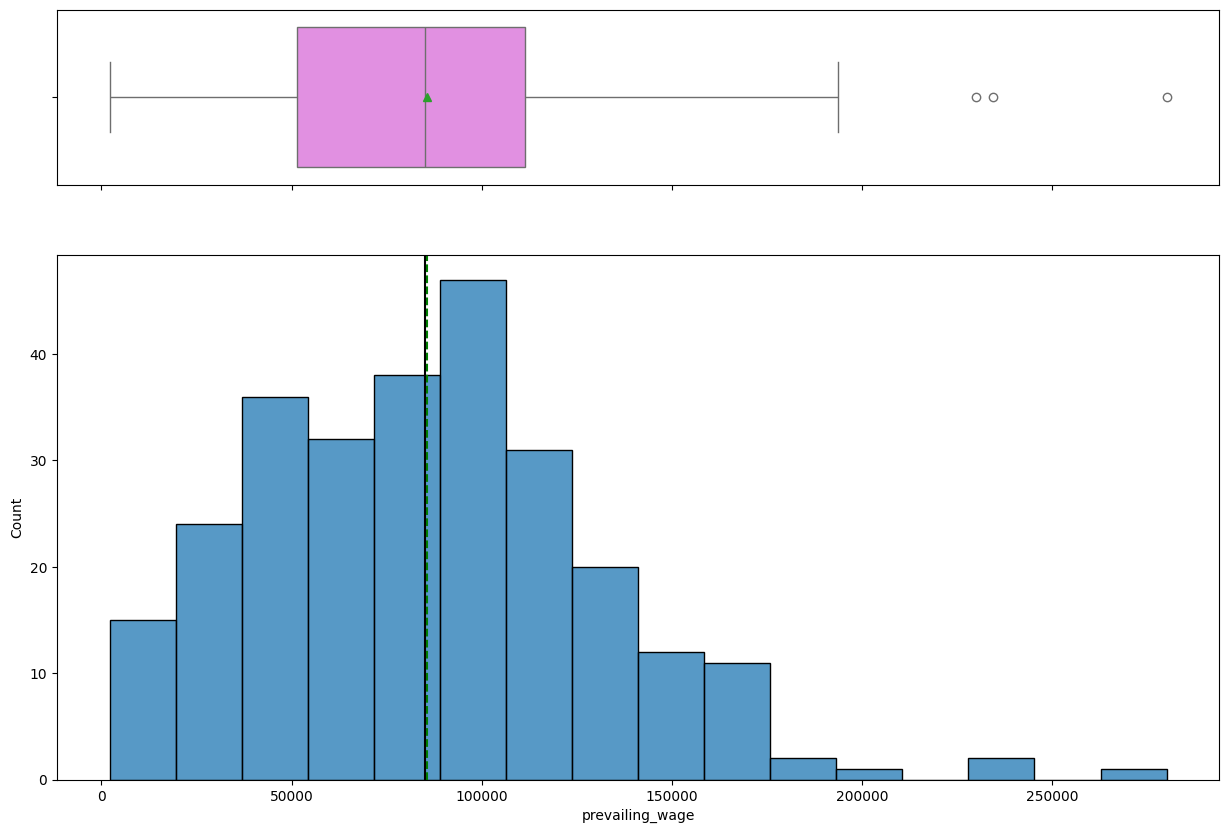

In [23]:
# Filter the DataFrame to include only rows where 'unit_of_wage' is 'Year'
prevailing_wage_week_df =  easyvisa_copy_df.loc[easyvisa_copy_df["unit_of_wage"] == "Week"]

# Visualize the distribution of 'prevailing_wage' for the filtered DataFrame
histogram_boxplot(prevailing_wage_week_df, "prevailing_wage")

**Observations**

1. The prevailing wage distribution for weekly wages is moderately right-skewed, with the majority of values concentrated between \$50,000 and \$120,000.
2. The boxplot highlights a few outliers above \$200,000, which could represent specialized or highly compensated roles.
3. The histogram shows a relatively balanced spread of wages within the range, with a peak around the \$100,000 mark.



**Hourly**

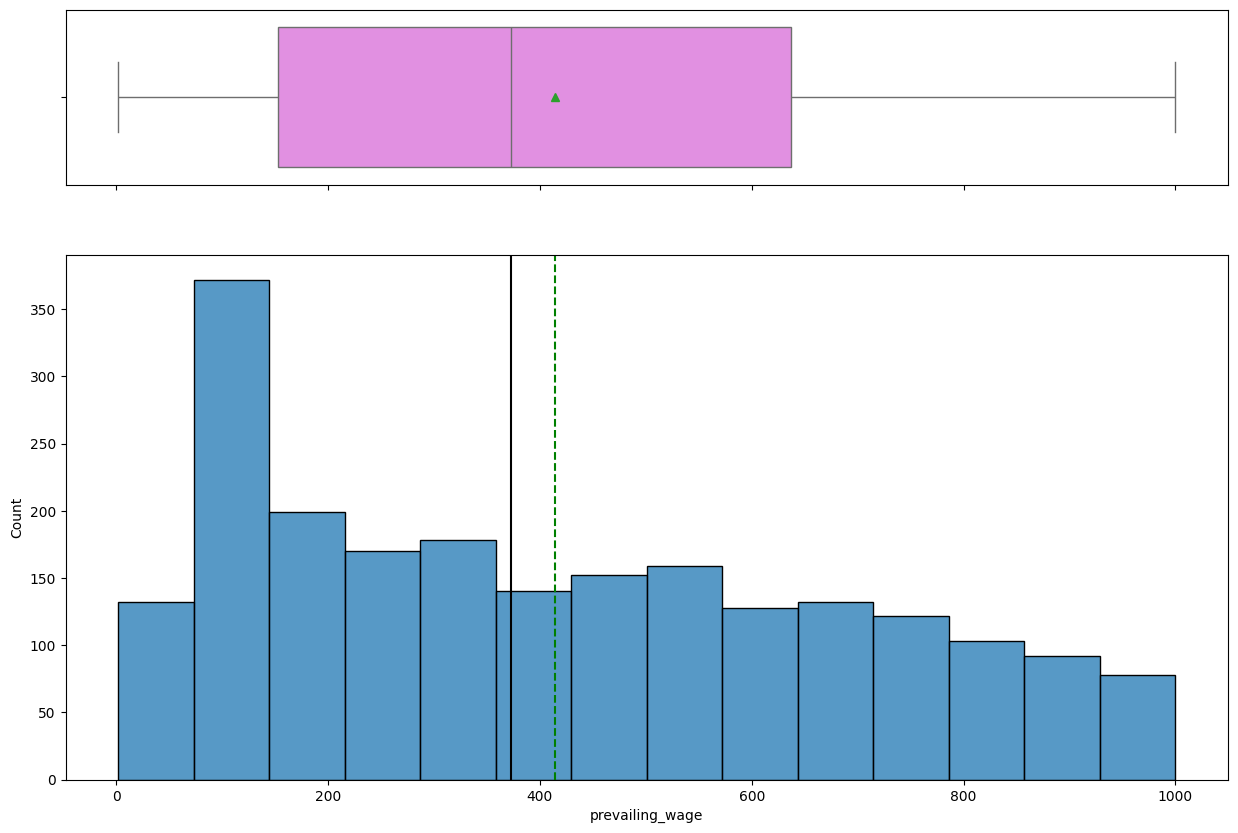

In [22]:
# Filter the DataFrame to include only rows where 'unit_of_wage' is 'Year'
prevailing_wage_hour_df =  easyvisa_copy_df.loc[easyvisa_copy_df["unit_of_wage"] == "Hour"]

# Visualize the distribution of 'prevailing_wage' for the filtered DataFrame
histogram_boxplot(prevailing_wage_hour_df, "prevailing_wage")

**Observations**

1. The prevailing wage distribution for hourly wages is moderately right-skewed, with the majority of values concentrated between \$0 and \$400. A noticeable peak is observed around $100, indicating a higher frequency of low hourly wages.

2. The histogram shows a decreasing trend in frequency beyond $400, with relatively fewer values in the higher wage range.

3. The boxplot reveals no significant outliers, as most values fall within the interquartile range, with a maximum value of approximately \$1,000.



#### Observations on continent

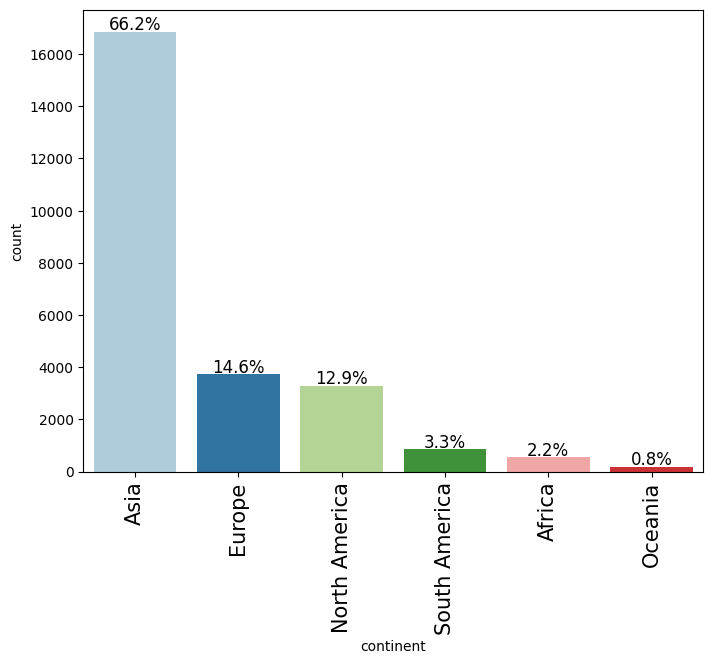

In [44]:
labeled_barplot(easyvisa_copy_df, "continent", perc=True)

**Observations**

1. Asia has the highest share of job applications, accounting for 66.2% of the total, indicating a significant reliance on workers from this region.

2. Europe and North America follow, contributing 14.6% and 12.9% of applications respectively.

3. South America (3.3%), Africa (2.2%), and Oceania (0.8%) collectively make up a small portion of applications, highlighting a lower demand or participation from these regions.

#### Observations on education of employee

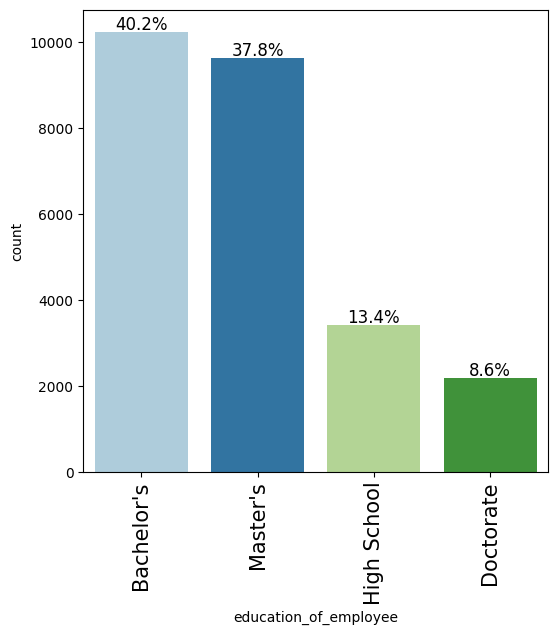

In [45]:
labeled_barplot(easyvisa_copy_df, "education_of_employee", perc=True)

**Observations**

1. Bachelor's degree holders make up the largest proportion of applicants, accounting for 40.2% of the dataset.
2. Master's degree holders follow closely, representing 37.8%, showing a strong representation of higher education.
3. High school and doctorate holders contribute comparatively smaller portions, with 13.4% and 8.6% respectively, indicating fewer applications from these educational levels.

#### Observations on job experience

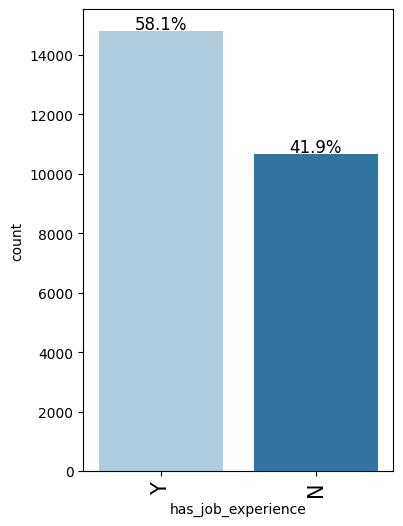

In [46]:
labeled_barplot(easyvisa_copy_df, "has_job_experience", perc=True)

**Observations**

1. A majority of the applicants, 58.1%, have prior job experience (Y), reflecting a preference for experienced candidates.
2. Applicants without job experience (N) constitute a smaller proportion at 41.9%.
3. The distribution highlights that while experience is prevalent, a significant number of inexperienced applicants also seek visa certification.

#### Observations on job training

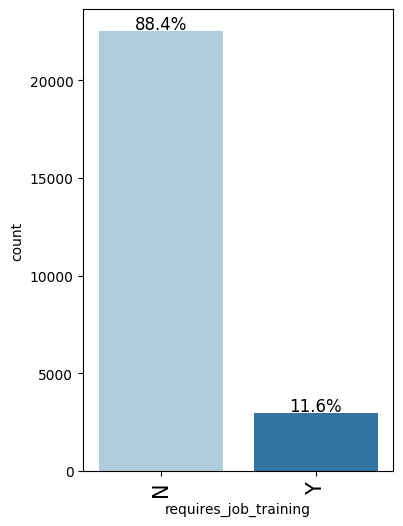

In [47]:
labeled_barplot(easyvisa_copy_df, "requires_job_training", perc=True)

**Observations**

1. A vast majority of the jobs, 88.4%, do not require additional job training (N), indicating a preference for candidates who are job-ready.
2. Only 11.6% of the jobs specify a requirement for job training (Y).
3. The significant skew toward jobs not requiring training suggests that employers expect candidates to possess the necessary skills and qualifications before applying.

#### Observations on region of employment

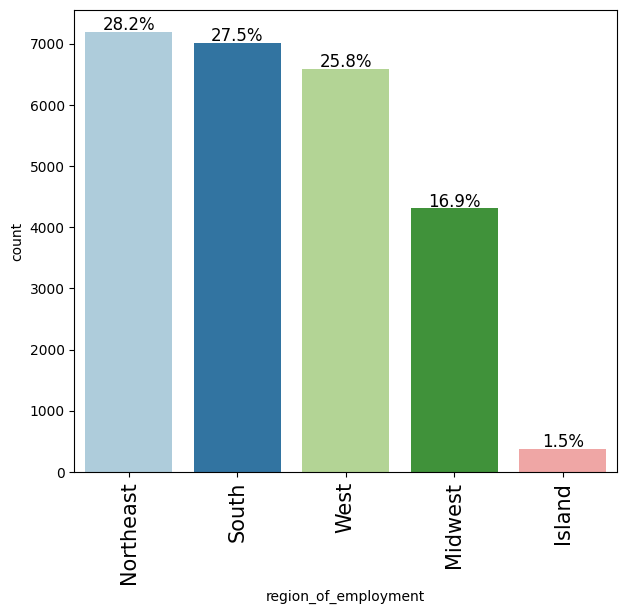

In [48]:
labeled_barplot(easyvisa_copy_df, "region_of_employment", perc=True)

**Observations**

1. The Northeast region leads with 28.2% of the employment opportunities, followed closely by the South at 27.5% and the West at 25.8%, indicating a relatively balanced distribution across these three regions.
2. The Midwest accounts for 16.9% of the opportunities, showing a slightly lower demand compared to the top three regions.
3. The Island region has the smallest share, contributing only 1.5% of the total, indicating limited employment opportunities in this region.


#### Observations on unit of wage

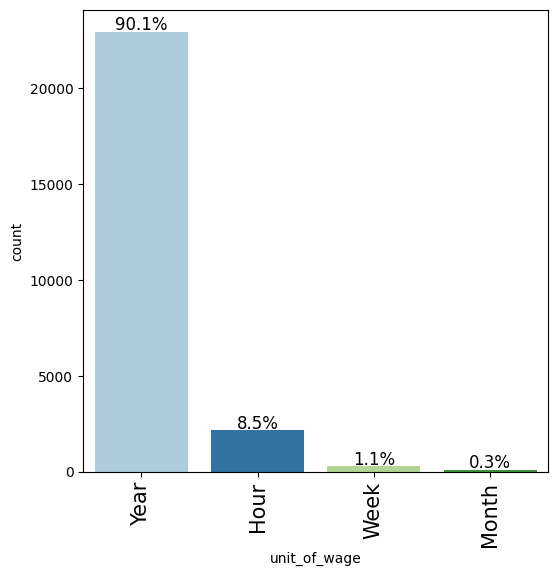

In [49]:
labeled_barplot(easyvisa_copy_df, "unit_of_wage", perc=True)

**Observations**

1. The majority of jobs offer yearly wages, representing 90.1% of the dataset, indicating a strong preference for annual compensation structures in certified job applications.

2. Hourly wages account for 8.5%, representing a smaller subset of jobs, likely tied to part-time or flexible roles.

3. Weekly and monthly wages are rare, comprising just 1.1% and 0.3% of the dataset, respectively.

#### Observations on Year of Establishment

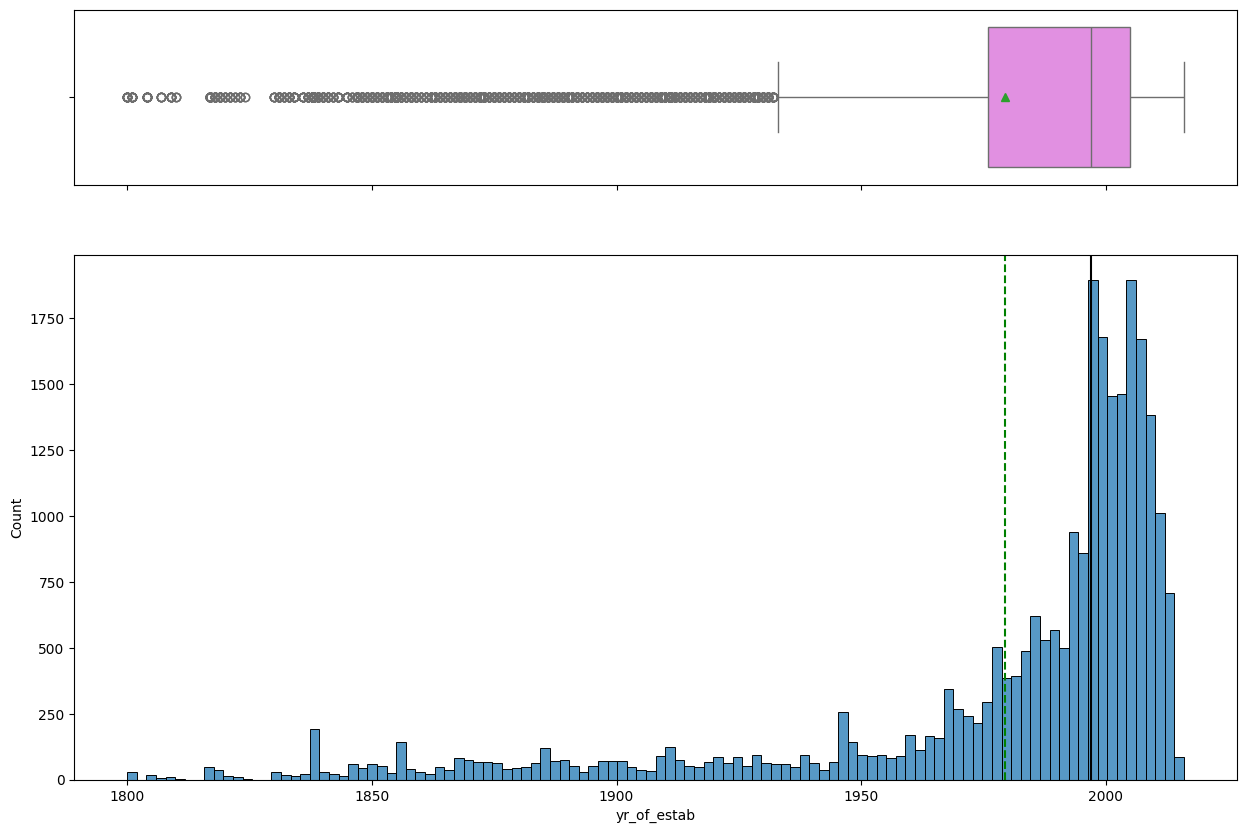

In [51]:
histogram_boxplot(easyvisa_copy_df, "yr_of_estab")

**Observations**

1. The distribution is left-skewed, with the majority of establishments founded between 1980 and 2020, reflecting modern organizations.

2. The histogram shows a gradual increase in the number of establishments after 1950, peaking between 2000 and 2020, indicating a surge in newer organizations.

3. The boxplot highlights older establishments as potential outliers, with a few companies dating back to the 1800s, forming a long tail in the distribution.


#### Observations on Full time Position

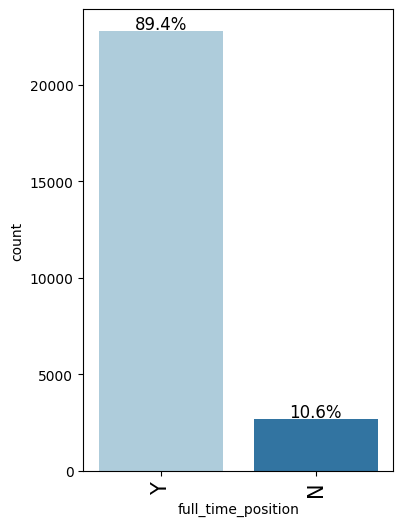

In [52]:
labeled_barplot(easyvisa_copy_df, "full_time_position", perc=True)

**Observations**

1. The majority (89.4%) of job positions are full-time, indicating that most certifications are aimed at securing full-time roles.

2. Only 10.6% of positions are part-time, suggesting a significantly lower demand for part-time certifications.

3. This distribution reflects a clear preference for full-time job applications among visa certification requests.

#### Observations on Case Status

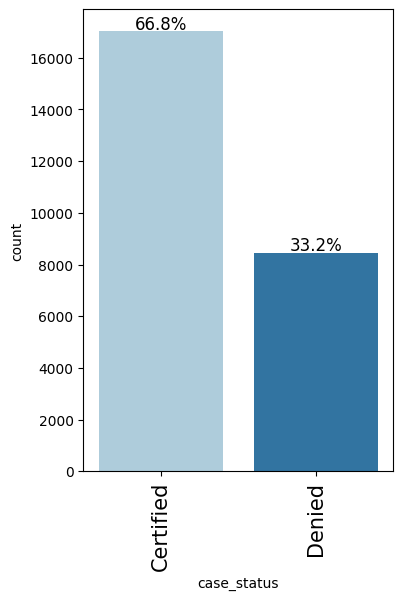

In [53]:
labeled_barplot(easyvisa_copy_df, "case_status", perc=True)

**Observations**

1. The majority (66.8%) of visa certification cases have been approved ("Certified"), showing a favorable trend for applicants.

2. A considerable portion (33.2%) of cases have been denied ("Denied"), highlighting that a non-negligible number of applications face rejection.

3. The distribution reflects a moderately favorable approval rate for job certification applications, with about two-thirds being successful.

#### Summary of Insights

1. Number of Employees: The distribution is highly right-skewed, with most values concentrated below 500 employees. Significant outliers exceed 100,000 employees, likely representing very large organizations.

2. Prevaling Wage: The prevailing wage distribution is right-skewed, with most values concentrated near \$0 due to hourly or weekly wage records. Outliers begin beyond \$200,000, extending up to \$300,000, representing high-paying roles primarily in the yearly wage category

 * Yearly Wages: Concentrated between \$40,000 and \$120,000, with outliers above \$200,000 extending to \$300,000.
 * Monthly Wages: Uniform distribution up to \$150,000, with outliers starting at \$200,000 and extending to \$250,000.
 * Weekly Wages: Concentrated between \$50,000 and \$120,000, with a peak near \$100,000 and a few outliers above \$200,000.
 * Hourly Wages: Most values fall between \$0 and \$400, peaking at \$100, with no significant outliers.
3. Continent: The majority of job applications originate from Asia (66.2%), followed by Europe (14.6%) and North America (12.9%). Applications from Africa, South America, and Oceania are minimal.

4. Education of Employees: Bachelor's degree holders (40.2%) dominate, followed closely by Master's degree holders (37.8%). High School and Doctorate degrees account for smaller proportions (13.4% and 8.6%, respectively).

5. Job Experience: 58.1% of applicants have job experience, while 41.9% do not, indicating a balance but slight preference for experienced candidates.

6. Job Training: A significant majority (88.4%) of applications are for roles not requiring additional job training, with only 11.6% requiring training.

7. Region of Employment: The Northeast (28.2%) is the most common employment region, followed closely by the South (27.5%) and West (25.8%). The Midwest and Island regions account for much smaller proportions.

8. Unit of Wage: Yearly wages dominate (90.1%), with hourly wages (8.5%) being the only other significant unit. Weekly and monthly wages are rare (1.1% and 0.3%).

9. Year of Establishment: The distribution is left-skewed, with most establishments founded between 1980 and 2020. Older establishments from the 1800s appear as outliers, forming a long tail.

10. Full-Time Position: Most job roles are full-time (89.4%), with only 10.6% being part-time positions.

11. Case Status: Two-thirds of visa applications (66.8%) are certified, while 33.2% are denied.

### Bivariate Analysis

#### Correlation Check

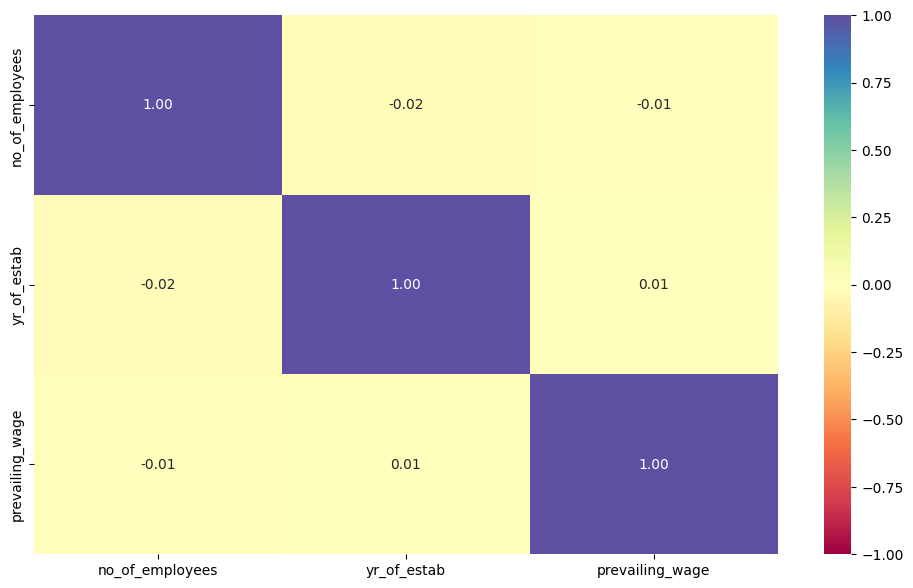

In [56]:
# Select the numeric columns from the DataFrame and store their names in a list
cols_list = easyvisa_copy_df.select_dtypes(include=np.number).columns.tolist()

# Set the figure size
plt.figure(figsize=(12, 7))

# Plot a heatmap to visualize the correlation matrix of the selected numeric columns
sns.heatmap(
    easyvisa_copy_df[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)

# Display the heatmap
plt.show()

**Observations**

* The correlation values among no_of_employees, yr_of_estab, and prevailing_wage are all close to zero, indicating minimal linear relationships between these features.

#### Checking if Education has an impact on VIsa Certification

case_status            Certified  Denied    All
education_of_employee                          
All                        17018    8462  25480
Bachelor's                  6367    3867  10234
High School                 1164    2256   3420
Master's                    7575    2059   9634
Doctorate                   1912     280   2192
------------------------------------------------------------------------------------------------------------------------


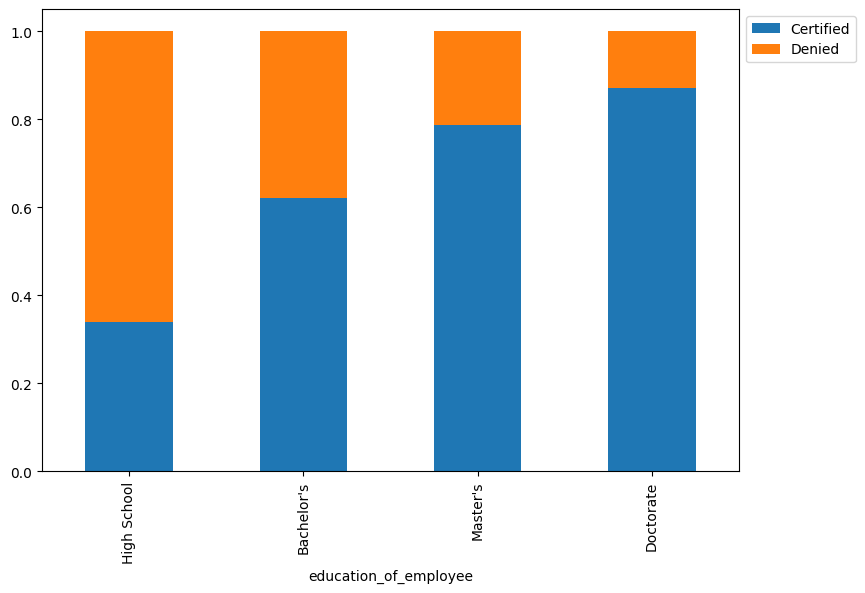

In [57]:
stacked_barplot(easyvisa_copy_df, "education_of_employee", "case_status")

**Observations**


1. Employees with higher education levels (Master’s and Doctorate) show higher certification rates, with Doctorate holders experiencing the highest proportion of approvals.

2. High School graduates have the highest denial rates, with less than half of their applications being certified.

3. Bachelor’s degree holders display a balanced certification-to-denial ratio, while Master’s degree holders are more likely to have their applications certified.

4. **Answer to Leading Question**: Education plays a significant role in visa certification, with higher educational qualifications correlating with increased approval rates.

#### Variation in Visa status vary across different continents

case_status    Certified  Denied    All
continent                              
All                17018    8462  25480
Asia               11012    5849  16861
North America       2037    1255   3292
Europe              2957     775   3732
South America        493     359    852
Africa               397     154    551
Oceania              122      70    192
------------------------------------------------------------------------------------------------------------------------


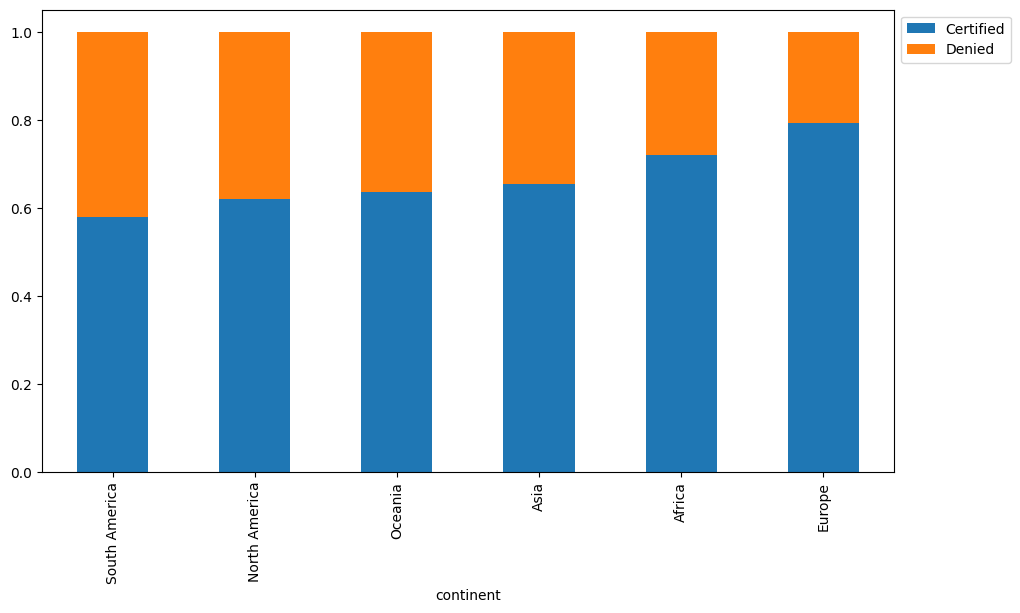

In [58]:
stacked_barplot(easyvisa_copy_df, "continent", "case_status")

**Observations**

1. Asia accounts for the largest share of applications, with 65.3% certified and 34.7% denied, indicating a moderate success rate.

2. Smaller continents (South America, Africa, Oceania) exhibit certification rates ranging between 60-65%, showing consistency in visa outcomes despite lower application volumes

3. Europe has the most favorable certification rate at 79.2%, highlighting the highest success rate among continents, in contrast to South America, which has the highest denial rate at 42.1%.

4. Visa status varies across continents, with Europe demonstrating the highest certification rate (79.2%), while South America experiences the highest denial rate (42.1%)

5. **Answer to Leading Question**: The visa status varies significantly across continents. Europe has the most favorable outcomes with the lowest denial rate at 20.8%, while South America faces the highest denial rate at 42.1%. Asia, despite having the majority of applications (66.2%), experiences a denial rate of 34.7%, slightly above the global average of 33.2%.


#### Checking if Work experience influences VIsa Certification

case_status         Certified  Denied    All
has_job_experience                          
All                     17018    8462  25480
N                        5994    4684  10678
Y                       11024    3778  14802
------------------------------------------------------------------------------------------------------------------------


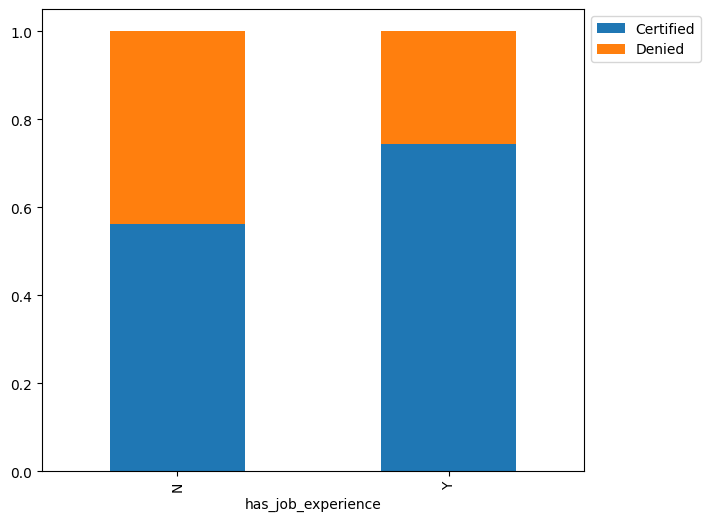

In [59]:
stacked_barplot(easyvisa_copy_df, "has_job_experience", "case_status")

**Observations**

1. Applicants with job experience are more likely to have their visa applications certified, with a certification rate of 74.5% (11,024 certified out of 14,802).

2. Applicants without job experience have a higher denial rate, with only 56.2% of applications certified (5,994 certified out of 10,678).

3. The disparity indicates that job experience significantly increases the likelihood of visa certification.

4. **Answer to Leading Question**: Work experience does influence visa status. Applicants with job experience have a certification rate of 74.5%, significantly higher than the 56.2% certification rate for applicants without experience. This demonstrates that work experience is a crucial factor in visa certification decisions.

#### Checking which pay unit is most likely to be certified for a visa

case_status   Certified  Denied    All
unit_of_wage                          
All               17018    8462  25480
Year              16047    6915  22962
Hour                747    1410   2157
Week                169     103    272
Month                55      34     89
------------------------------------------------------------------------------------------------------------------------


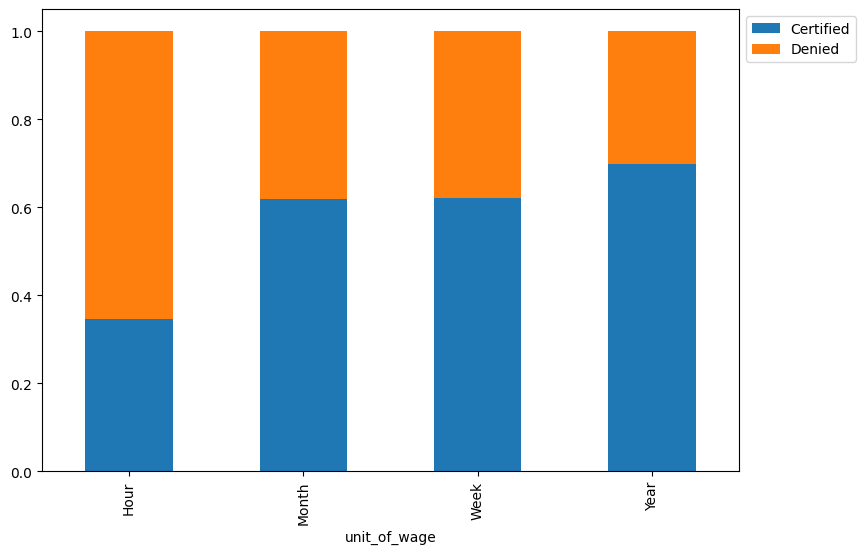

In [60]:
stacked_barplot(easyvisa_copy_df, "unit_of_wage", "case_status")

**Observations**

1. Yearly wage jobs dominate with the highest certification rate of 69.9% (16,047 certified out of 22,962), reflecting the preference for annual salary roles in visa certifications.

2. Hourly wage jobs have a significantly lower certification rate of 34.6% (747 certified out of 2,157), highlighting challenges faced by these roles in the certification process.

3. Weekly and monthly wage jobs also have relatively high certification rates of 62.1% (169 certified out of 272) and 61.8% (55 certified out of 89), respectively, despite their low representation.

4. **Answer to Leading Question**: Employees with yearly wage jobs are most likely to be certified for a visa, with a certification rate of 69.9%, significantly higher than other wage units. Hourly wage jobs, in contrast, have the lowest certification rate at 34.6%, reflecting a disparity in certification likelihood based on pay intervals.

#### Checking if Visa Status Changes with the Prevailing Wage

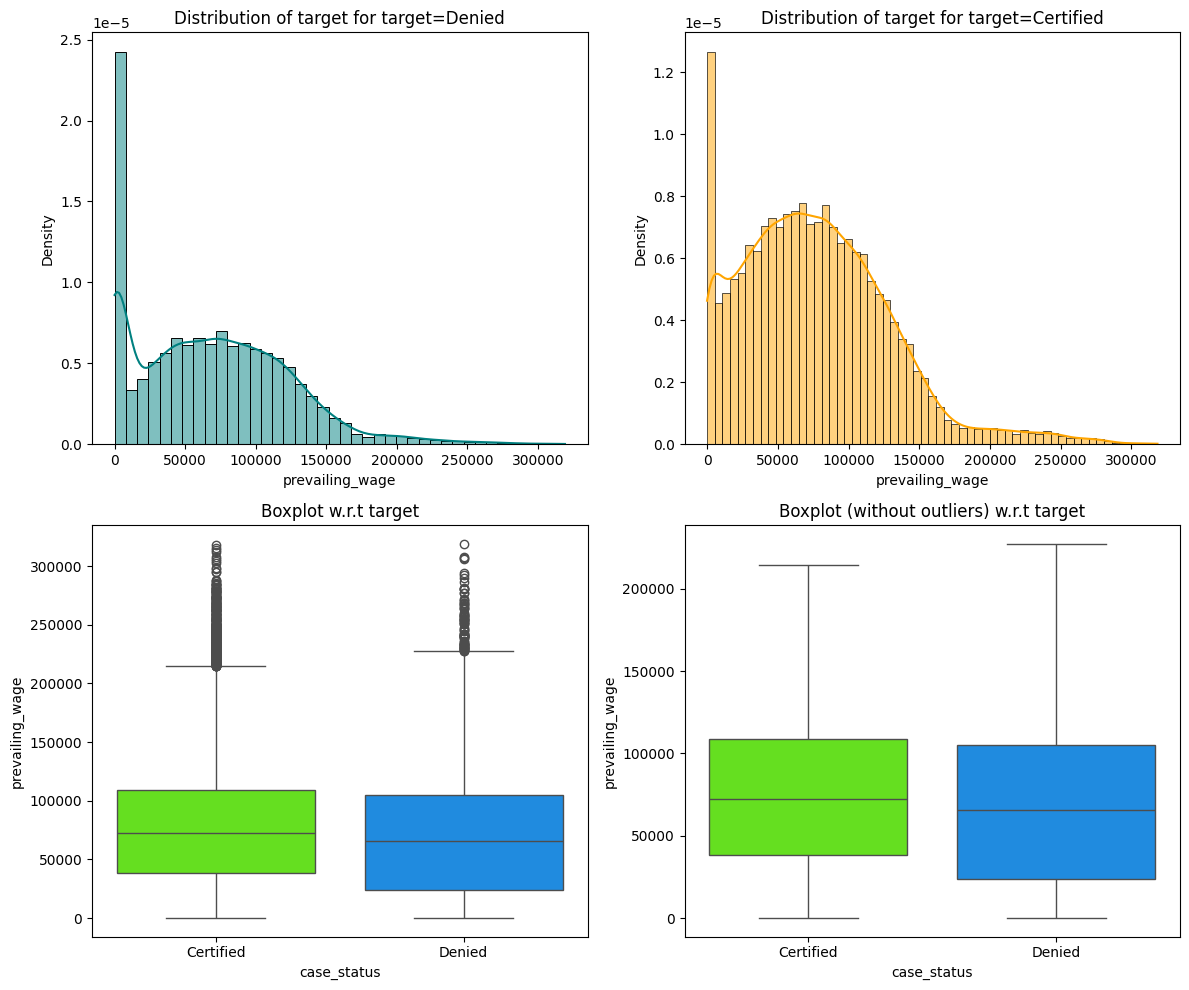

In [16]:
distribution_plot_wrt_target(easyvisa_copy_df, 'prevailing_wage','case_status')

**Observations**

1. Both certified and denied applications display outliers extending beyond \$200,000, reflecting high-paying specialized roles.

2. Denied applications exhibit a wider range of prevailing wages compared to certified applications.

3. Certified applications have a higher median prevailing wage, indicating a positive association between higher wages and certification.

4. Certified applications exhibit higher 25th and 75th percentiles of prevailing wages compared to denied applications, suggesting that certified applications tend to concentrate within higher wage brackets.

5. From the histogram, Certified applications show a pronounced density in the wage range of approximately \$40,000 to \$120,000, peaking significantly within this range. This suggests that jobs offering wages in this mid-range are more likely to be certified, indicating a positive relationship between moderate prevailing wages and visa certification outcomes.

5. **Answer to the Leading Question**: Certified applications are associated with slightly higher prevailing wages compared to denied applications. This is reflected in their marginally higher median, as well as elevated 25th and 75th percentiles. The pronounced density in the mid-range wage bracket of \$40,000 to \$120,000, where certification rates peak, highlights a strong positive relationship between moderate prevailing wages and visa certification outcomes. This suggests that jobs offering mid-range wages are more likely to secure certification

#### Checking Prevailing Wages Across all Regions in the US

**Yearly**

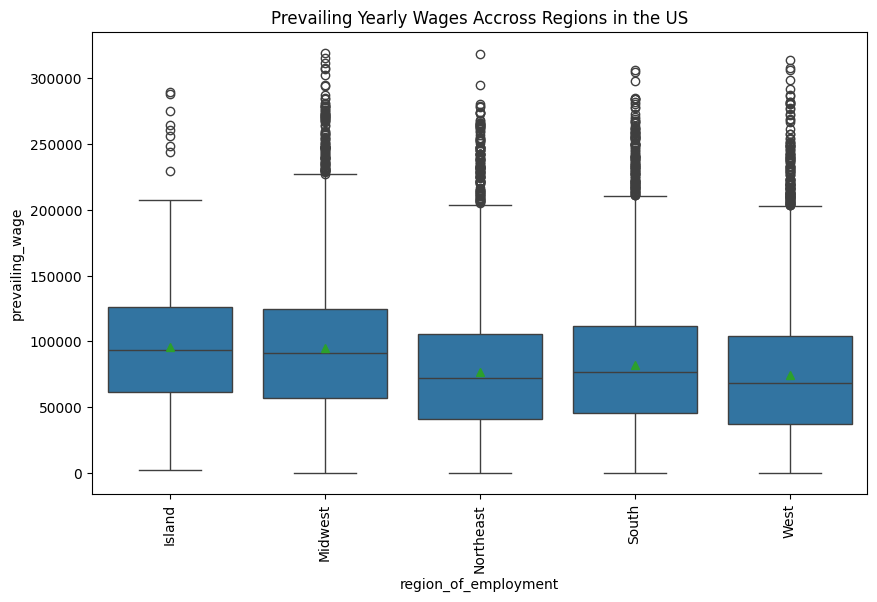

In [20]:
# Filter the DataFrame to include only rows where 'unit_of_wage' is 'Year'
prevailing_wage_year_df =  easyvisa_copy_df.loc[easyvisa_copy_df["unit_of_wage"] == "Year"]
fn_boxplot(prevailing_wage_year_df, xvariable='region_of_employment' , yvariable ='prevailing_wage' ,plt_title="Prevailing Yearly Wages Accross Regions in the US")

**Observations**

1. All regions exhibit similar variability in prevailing wages. However, the Island and Midwest regions show higher 25th and 75th percentiles, placing them in higher wage brackets overall, while the Northeast has the lowest 25th and 75th percentiles, suggesting comparatively lower prevailing wages.

2. Outliers are present in all regions, extending beyond $200,000. These reflect high-paying specialized roles, with no significant concentration of outliers in any particular region, suggesting that high-paying jobs are uniformly distributed across the US regions.

3. Prevailing wages are generally consistent across US regions, with similar levels of variability observed. The Island and Midwest regions stand out with higher 25th and 75th percentiles, suggesting relatively higher wage brackets.


**Monthly**

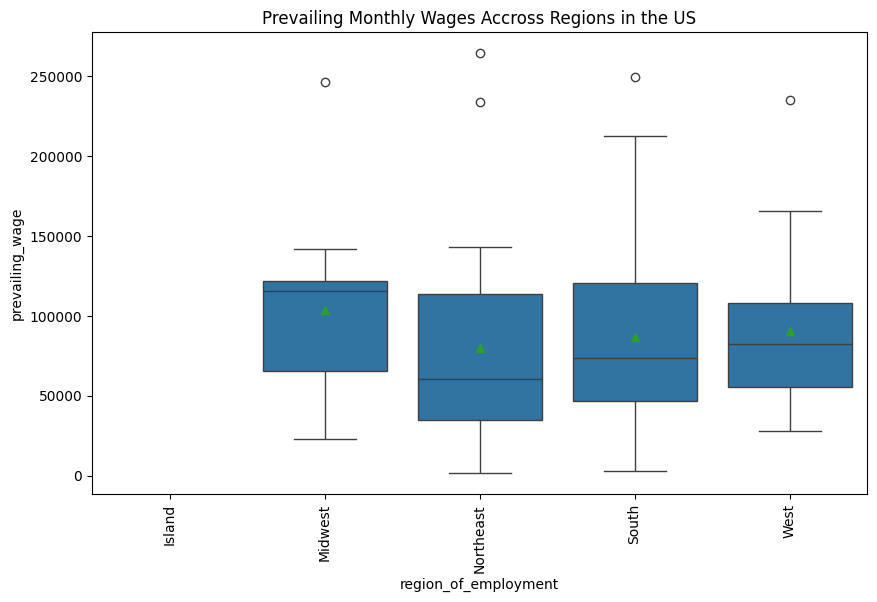

In [21]:
# Filter the DataFrame to include only rows where 'unit_of_wage' is 'Month'
prevailing_wage_month_df =  easyvisa_copy_df.loc[easyvisa_copy_df["unit_of_wage"] == "Month"]
fn_boxplot(prevailing_wage_month_df, xvariable='region_of_employment' , yvariable ='prevailing_wage' ,plt_title="Prevailing Monthly Wages Accross Regions in the US")

**Observations**

1. The Northeast and South regions exhibit higher variability in monthly wages, as indicated by their larger interquartile ranges.

2. Outliers extending beyond $200,000 are present across all regions, reflecting high-paying specialized roles. These outliers appear uniformly distributed, with no particular region showing a higher concentration of such roles.

3. The Northeast region stands out with noticeably lower wage levels compared to other regions, as indicated by its median and concentration of wages closer to the lower end of the range.

4. The Island region does not have any data represented for monthly wages, indicating that no roles offering monthly wages are associated with this region.

**Weekly**

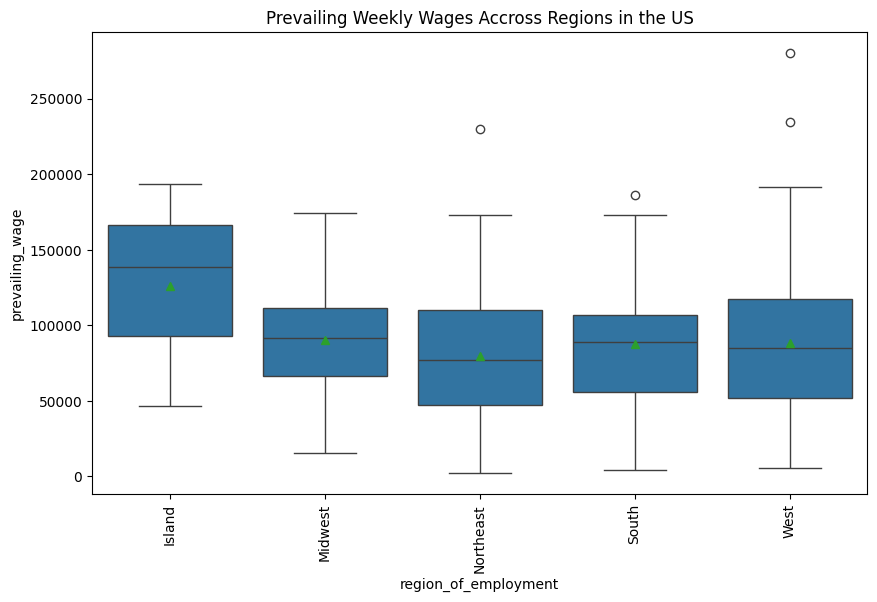

In [66]:
# Filter the DataFrame to include only rows where 'unit_of_wage' is 'Week'
prevailing_wage_week_df =  easyvisa_copy_df.loc[easyvisa_copy_df["unit_of_wage"] == "Week"]
fn_boxplot(prevailing_wage_week_df, xvariable='region_of_employment' , yvariable ='prevailing_wage' ,plt_title="Prevailing Weekly Wages Accross Regions in the US")

**Observations**

1. The Island region has noticeably higher prevailing weekly wages compared to other regions, as indicated by its elevated median and interquartile range (IQR).

2. The Northeast and South regions exhibit comparable interquartile ranges (IQRs), suggesting similar variability in weekly wages within these regions. Their median weekly wages are also relatively aligned.

3. Outliers are present only in the Midwest, Northeast, and West regions, extending beyond $200,000. These reflect specialized, high-paying weekly wage roles and are concentrated within these three regions.

4. For most regions, the distributions are relatively symmetric, whereas the Island region may have a skewed distribution due to its higher median wages.

**Hourly**

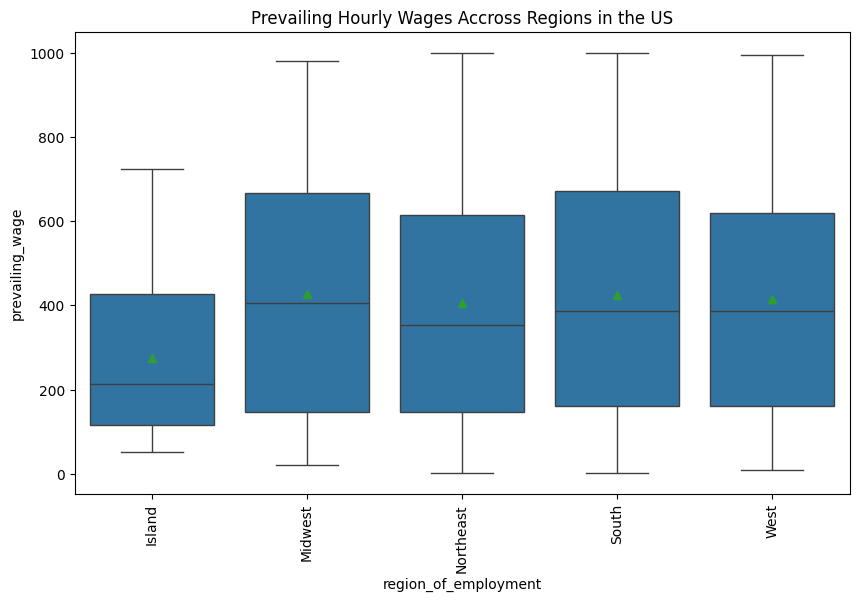

In [67]:
# Filter the DataFrame to include only rows where 'unit_of_wage' is 'Hour'
prevailing_wage_hour_df =  easyvisa_copy_df.loc[easyvisa_copy_df["unit_of_wage"] == "Hour"]
fn_boxplot(prevailing_wage_hour_df, xvariable='region_of_employment' , yvariable ='prevailing_wage' ,plt_title="Prevailing Hourly Wages Accross Regions in the US")

**Observations**

1. The Island region exhibits lower prevailing hourly wages compared to other regions, with both the median and interquartile range (IQR) positioned in lower wage brackets. However, the wages are relatively stable, as indicated by the lowest variability.

2. The Midwest and South regions have slightly higher median prevailing hourly wages with similar distributions and variability, as indicated by comparable IQRs.

3. The Northeast and West regions share similar distributions with slightly lower median hourly wages and IQRs compared to the Midwest and South, reflecting relatively stable and moderate wage levels.

#### Year of Establishment vs Case Status

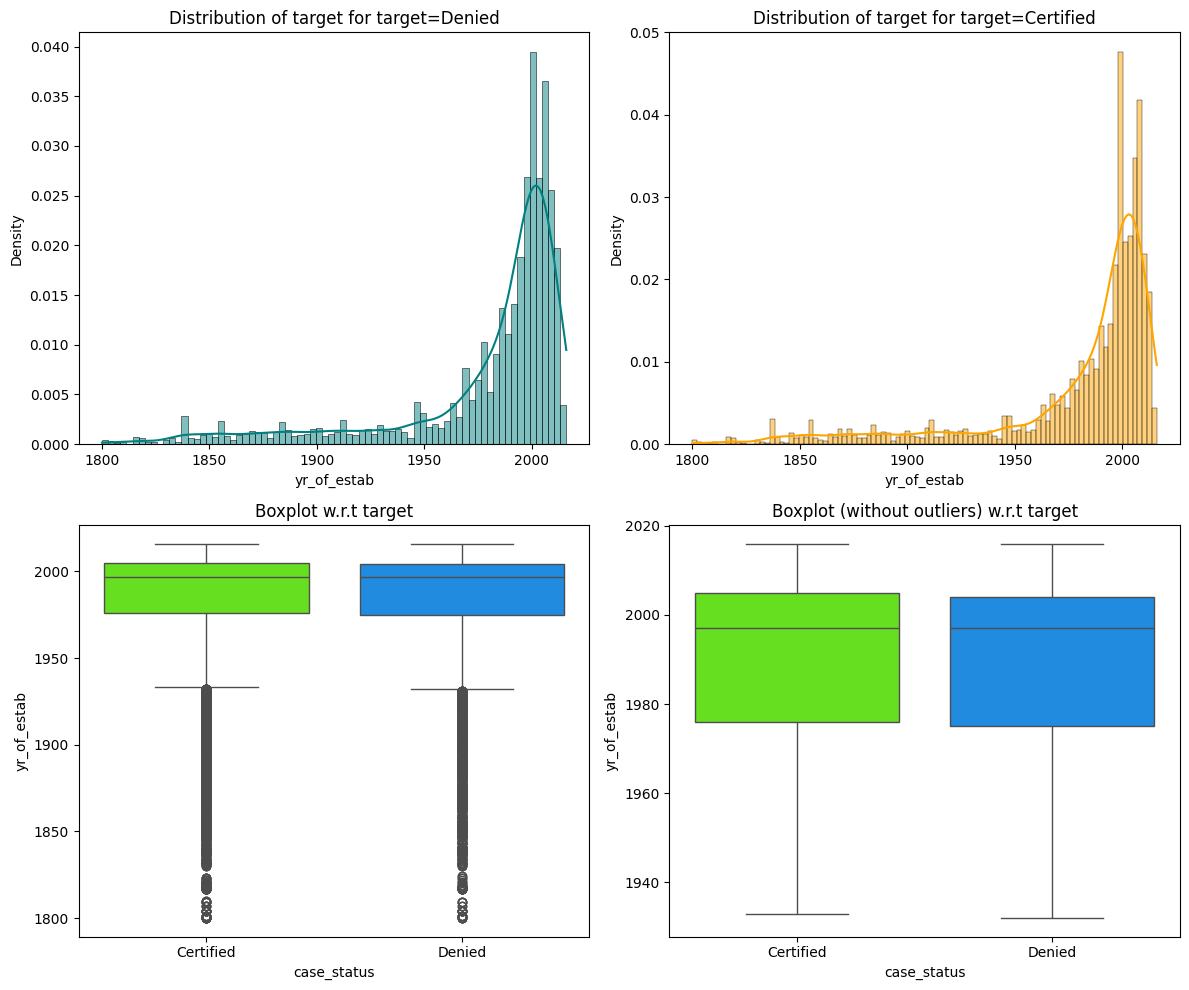

In [35]:
distribution_plot_wrt_target(easyvisa_copy_df, 'yr_of_estab','case_status')

**Observations**

1. Both certified and denied applications show a similar left-skewed distribution, with most establishments founded after 1980, suggesting minimal impact of establishment year on case status.

2. Boxplots indicate nearly identical medians, interquartile ranges, and outliers for both groups, reinforcing the lack of influence of establishment year on certification outcomes.

#### Region of Employment vs Case Status

case_status           Certified  Denied    All
region_of_employment                          
All                       17018    8462  25480
Northeast                  4526    2669   7195
West                       4100    2486   6586
South                      4913    2104   7017
Midwest                    3253    1054   4307
Island                      226     149    375
------------------------------------------------------------------------------------------------------------------------


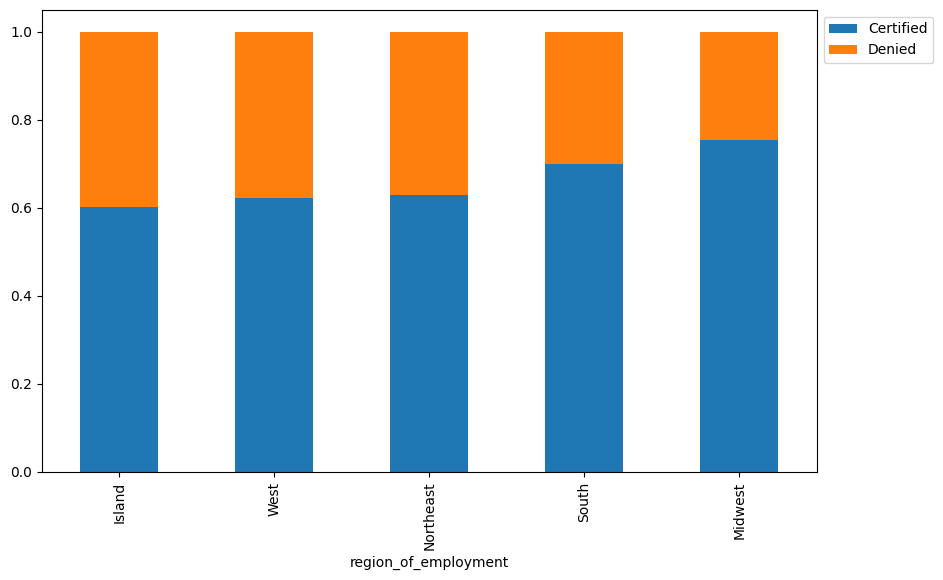

In [69]:
stacked_barplot(easyvisa_copy_df, "region_of_employment", "case_status")

**Observations**

1. The Midwest has the highest certification rate (75.5%), while the Island region has the lowest (60.3%), indicating challenges in securing certification for jobs in the Island region.

2. The Northeast (62.9%) and West (62.3%) have nearly identical certification rates, both significantly lower than the Midwest.

3. Certification rates vary by region, highlighting the Midwest as the most favorable and the Island region facing the highest denials.


#### Full Time Position vs Case Status

case_status         Certified  Denied    All
full_time_position                          
All                     17018    8462  25480
Y                       15163    7610  22773
N                        1855     852   2707
------------------------------------------------------------------------------------------------------------------------


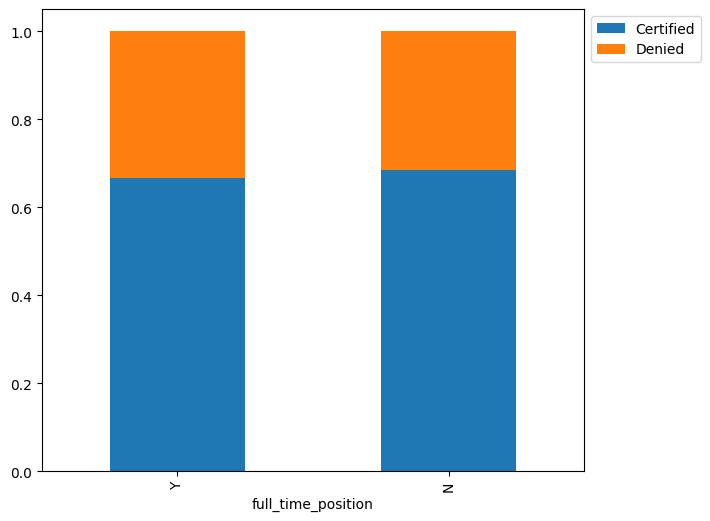

In [70]:
stacked_barplot(easyvisa_copy_df, "full_time_position", "case_status")

**Observations**

1. Full-time positions represent the majority of applications, with a certification rate of 66.6% (15,163 certified out of 22,773 total applications).

2. Part-time positions, while fewer in number, have a similar certification rate of 68.5% (1,855 certified out of 2,707 total applications).

3. This indicates that visa certification outcomes are not significantly influenced by whether the position is full-time or part-time. Both categories have comparable certification rates despite the higher volume of full-time applications.


#### Job Experience vs Case Status

case_status         Certified  Denied    All
has_job_experience                          
All                     17018    8462  25480
N                        5994    4684  10678
Y                       11024    3778  14802
------------------------------------------------------------------------------------------------------------------------


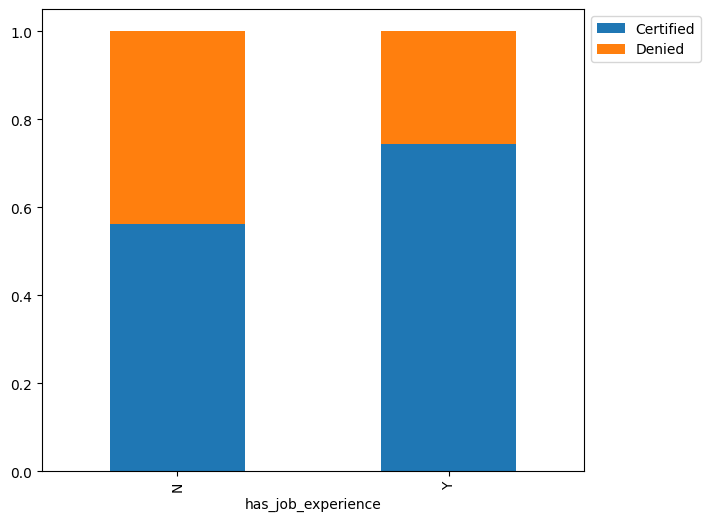

In [71]:
stacked_barplot(easyvisa_copy_df, "has_job_experience", "case_status")

**Observations**

1. Applicants with job experience account for a higher number of certifications, with 74.5% of their applications certified (11,024 certified out of 14,802 total applications).

2. Applicants without job experience have a lower certification rate of 56.1% (5,994 certified out of 10,678 total applications).

3. The data suggests that having job experience is associated with a significantly higher likelihood of visa certification, indicating that job experience might be a favorable factor in the decision-making process.

#### Requires Training vs Case Status

case_status            Certified  Denied    All
requires_job_training                          
All                        17018    8462  25480
N                          15012    7513  22525
Y                           2006     949   2955
------------------------------------------------------------------------------------------------------------------------


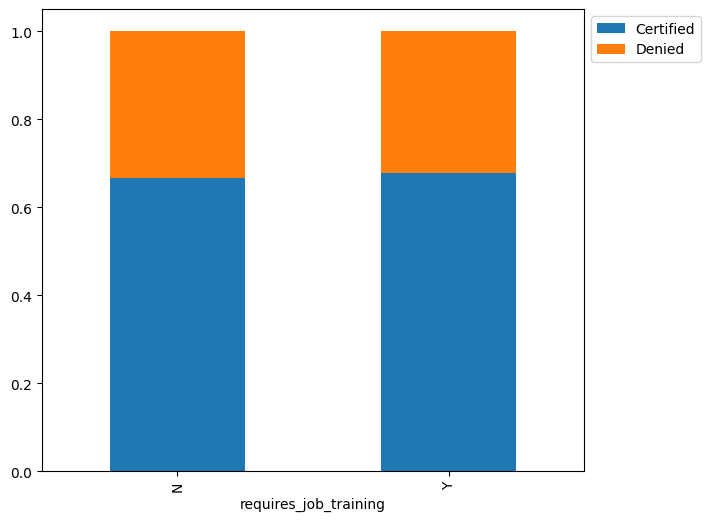

In [72]:
stacked_barplot(easyvisa_copy_df, "requires_job_training", "case_status")

**Observations**

* Although there are significantly more applications for jobs not requiring training, these have a certification rate of 66.7%, compared to a slightly higher rate of 67.9% for jobs requiring training. This indicates minimal influence of training requirements on certification outcomes

#### Work experience vs Job training

requires_job_training      N     Y    All
has_job_experience                       
All                    22525  2955  25480
N                       8988  1690  10678
Y                      13537  1265  14802
------------------------------------------------------------------------------------------------------------------------


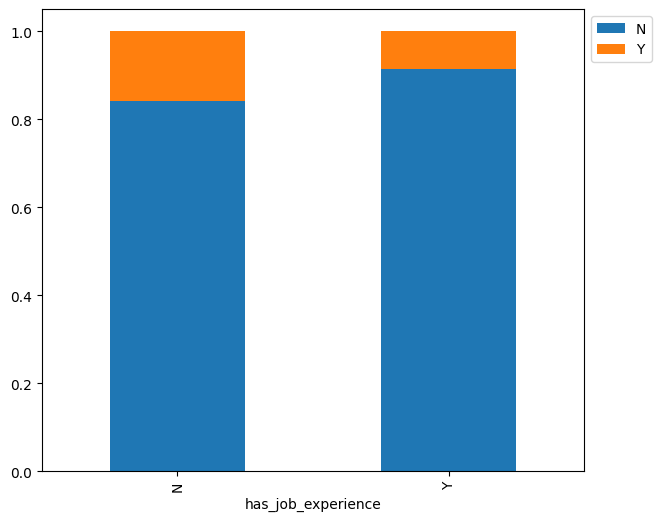

In [74]:
stacked_barplot(easyvisa_copy_df, "has_job_experience", "requires_job_training")

**Observations**

1. A higher proportion of applications (13,537 out of 22,525) for jobs not requiring training are associated with prior work experience, suggesting a preference for experienced candidates in roles that do not mandate additional training.

2. For jobs requiring training, 1,690 applications out of 2,955 involve candidates without prior work experience, indicating that roles requiring training are more likely to attract less experienced candidates.

#### Percentage of Visa Certification and Denial Across Continents

**Certifications**

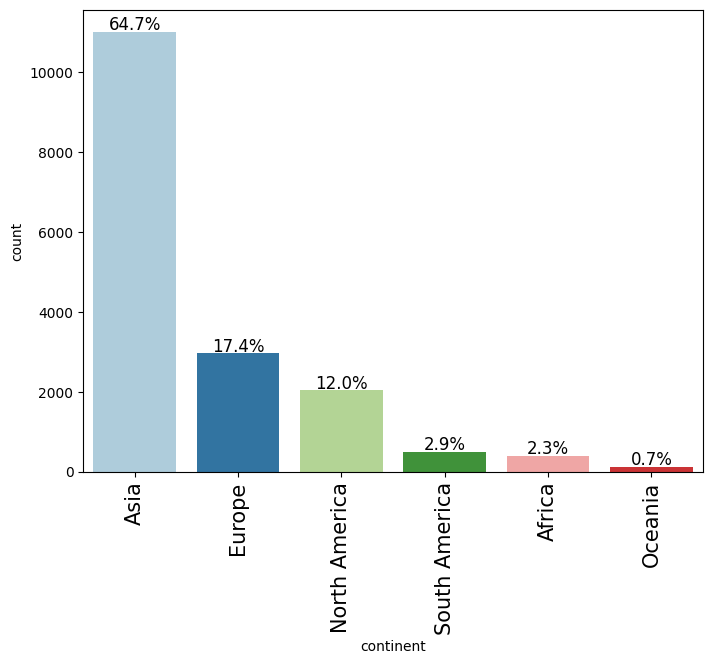

In [75]:
Certified_df =  easyvisa_copy_df.loc[easyvisa_copy_df["case_status"] == "Certified"]
labeled_barplot(Certified_df, "continent", perc=True)

**Observations**

1. Asia dominates in terms of number of visa certifications, accounting for 64.7% of all applications, showcasing its significant contribution to the overall pool.

2. Europe follows with 17.4%, indicating its position as the second-largest contributor to certified applications.

3. . North America contributes 12%, while the remaining continents—South America (2.9%), Africa (2.3%), and Oceania (0.7%)—have minimal representation in the certified applications.


**Denials**

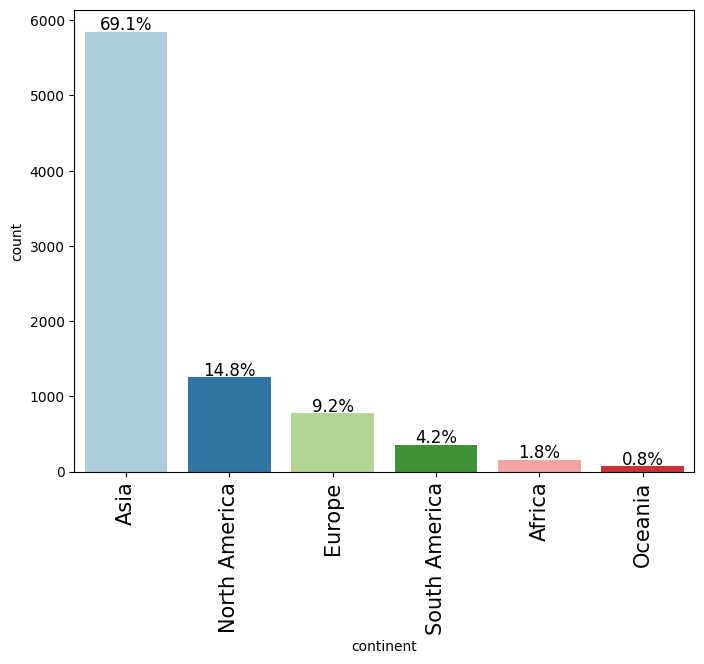

In [77]:
Denied_df =  easyvisa_copy_df.loc[easyvisa_copy_df["case_status"] == "Denied"]
labeled_barplot(Denied_df, "continent", perc=True)

**Observations**

1. Asia leads in denials as well, with 69.1%, reflecting its dominance in the total application pool.

2. North America accounts for 14.8%, showing its position as the second-largest contributor to denied applications.

3. Europe contributes 9.2% to the denials, followed by South America (4.2%), Africa (1.8%), and Oceania (0.8%), indicating relatively lower denial rates from these regions.

#### Percentage of Visa Certification and Denial Across Eeducation of Employee

**Certifications**

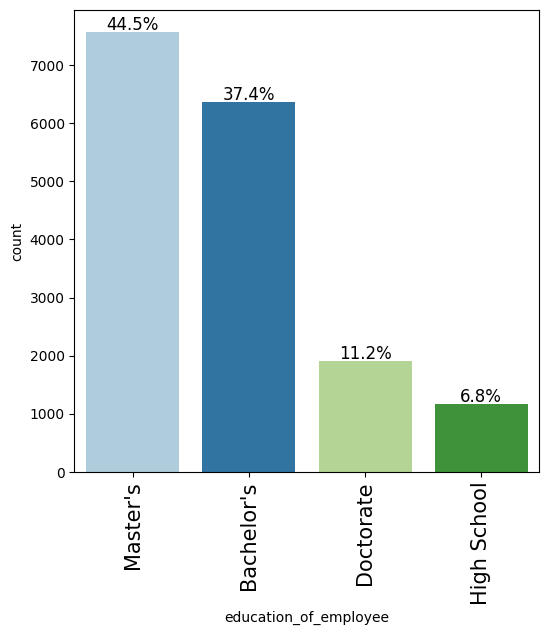

In [22]:
Certified_df =  easyvisa_copy_df.loc[easyvisa_copy_df["case_status"] == "Certified"]
labeled_barplot(Certified_df, "education_of_employee", perc=True)

**Observations**

1. Master's Degree: Employees with a Master's degree dominate certifications, accounting for 44.5% of the total certified applications, indicating a strong preference for advanced qualifications.

2. Bachelor's Degree: Bachelor's degree holders represent the second-largest group, making up 37.4% of certified applications, showing a significant but slightly lower preference compared to Master's degree holders.

3. Doctorate and High School: Employees with a Doctorate account for 11.2% of certifications, reflecting a moderate preference, while those with only a High School diploma make up the smallest group at 6.8%, indicating limited acceptance for lower education levels.

**Denials**

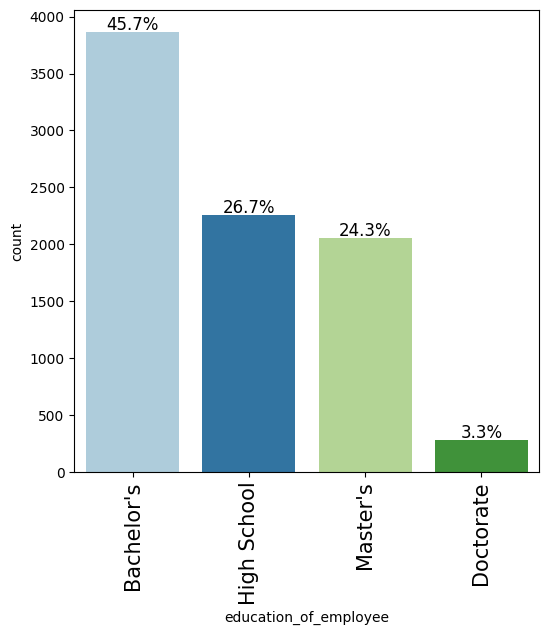

In [24]:
Denied_df =  easyvisa_copy_df.loc[easyvisa_copy_df["case_status"] == "Denied"]
labeled_barplot(Denied_df, "education_of_employee", perc=True)

**Observations**

1. Bachelor's Degree: Employees with a Bachelor's degree account for the majority of denials, representing 45.7% of the total denied applications, indicating significant scrutiny despite their educational qualifications.

2. High School Diploma: High school graduates contribute to 26.7% of the denials, reflecting higher challenges for applicants with lower educational levels.

3. Master's Degree and Doctorate: Applicants with a Master's degree make up 24.3% of denials, while Doctorate holders face the least denials at 3.3%, highlighting a preference for higher educational qualifications in visa decisions.

#### Summary of Insights

******************************
**Bivariate Analysis**
******************************

1. Doctorate and Master’s degree holders have the highest visa certification rates, while high school graduates face the highest denial rates. Bachelor’s degree holders show a balanced certification-to-denial ratio.

2. Europe leads with the highest visa certification rate (79.2%), while South America faces the highest denial rate (42.1%). Asia, the largest contributor, shows a moderate success rate with 65.3% certifications. Smaller continents like South America, Africa, and Oceania maintain consistent certification rates of 60-65% despite lower application volumes.

3. Job experience significantly boosts visa certification rates, with 74.5% of experienced applicants approved compared to only 56.2% for those without experience, highlighting a clear advantage for applicants with prior work experience.

4. Yearly wage jobs lead with the highest certification rate (69.9%), reflecting a preference for annual salary roles in visa approvals. Weekly (62.1%) and monthly (61.8%) wage jobs also show strong certification rates despite lower representation, while hourly wage jobs face the greatest challenges, with only 34.6% certified.

5. Certified applications tend to have higher prevailing wages, with a pronounced density in the \$40,000 to \$120,000 range and higher median, 25th, and 75th percentiles compared to denied applications, indicating a positive link between higher wages and certification. Denied applications show a wider wage range, while both categories include outliers above $200,000, reflecting high-paying specialized roles.

6. Prevailing wages are generally consistent across US regions, with similar variability. However, the Island and Midwest regions stand out with higher 25th and 75th percentiles, indicating higher wage brackets, while the Northeast has the lowest percentiles. Outliers above \$200,000 are uniformly distributed across regions, reflecting high-paying specialized roles.

7. Prevailing Wages Across All Regions in the US

  * Yearly Wages: The Island and Midwest regions have the highest wage brackets, while the Northeast shows lower prevailing wages. High-paying roles with outliers above \$200,000 are uniformly distributed across all regions.

  * Monthly Wages: The Northeast and South exhibit the most variability, with the Northeast showing lower median wages. The Island region has no data for monthly wages, and outliers are evenly spread across regions.

  * Weekly Wages: The Island region leads with the highest weekly wages, while the Midwest, Northeast, and West have concentrations of high-paying roles. Most regions show symmetry in wage distribution, except the Island, which skews higher.

  * Hourly Wages: The Island region shows lower but stable wages, while the Midwest and South have slightly higher medians with moderate variability. Outliers are evenly distributed, with no region showing dominance in high-paying hourly roles.

8. Both certified and denied applications show a similar left-skewed distribution, with most establishments founded after 1980, suggesting minimal impact of establishment year on case status.

9. The Midwest leads with the highest certification rate (75.5%), while the Island region faces the most challenges at 60.3%. The Northeast (62.9%) and West (62.3%) show similar rates, both lower than the Midwest, highlighting regional disparities in certification outcomes

10. Full-time positions dominate in volume with a certification rate of 66.6%, while part-time positions, though fewer, show a slightly higher rate at 68.5%. This suggests that visa certification outcomes are consistent regardless of employment type.

11. Applicants with job experience have a significantly higher certification rate (74.5%) compared to those without experience (56.1%), highlighting job experience as a key factor positively influencing visa certification outcomes.

12. Although there are significantly more applications for jobs not requiring training, these have a certification rate of 66.7%, compared to a slightly higher rate of 67.9% for jobs requiring training. This indicates minimal influence of training requirements on certification outcomes



****************************
**Answers to Leading Questions**
****************************

1. Education and Visa Certification: Education plays a role in visa certification, with higher education levels generally associated with higher certification rates. Master's degree holders dominate certifications (44.5%), while high school applicants have the highest denial rate (65.9%), suggesting that advanced education positively influences visa outcomes.

2. Regional Influence on Visa Status: Regional variations in visa certification rates exist. Asia has the highest share of applications (64.7%), but with a slightly higher denial rate compared to Europe, which has the most favorable certification rate (79.2%). South America experiences the highest denial rate (42.1%), while North America and Africa show moderate outcomes. This highlights regional differences in visa approval likelihood.

3. Work Experience and Visa Certification: Applicants with prior job experience have higher certification rates (74.5%) compared to those without experience (56.1%). This indicates that relevant work experience is a significant factor influencing visa certification success.

4. Pay Units and Visa Certification: Yearly wages are the most common and certified (69.8%), followed by hourly wages (34.6%). Monthly wages have the lowest certification share, suggesting that visa approvals favor standard pay structures like yearly and hourly compensation.

5. Prevailing Wages and Visa Certification: Certified applications tend to concentrate in a wage range of \$40,000 to \$120,000, peaking in this range, while denied applications show broader variability. This suggests that mid-range wages are more likely to result in visa approvals.

6. Regional Influence on Visa Status: Regional disparities in visa certification exist. Europe has the most favorable outcomes (79.2% certification rate), while South America has the highest denial rate (42.1%). Asia, despite a high share of applications, shows slightly higher denial rates than Europe. These trends emphasize how regional contexts affect visa outcomes.

7. Job Training and Visa Status: Although most applications are for jobs not requiring training, certification rates for these positions (66.7%) are only slightly lower than for roles requiring training (67.9%). This indicates that training requirements do not have a substantial influence on certification outcomes, reflecting consistent decision-making across both categories.

## Preliminary Recommendations for Suitable Applicant Profiles for Visa Certification


Based on the insights from EDA, here are preliminary recommendations for suitable profiles of applicants for whom the visa should be certified. These recommendations are grounded in observed patterns and serve as a foundation for validation through modeling to refine the key drivers of visa certification:

  * Education: Applicants with advanced degrees, such as Master's and Doctorate holders, are more likely to have their visas certified, as they exhibit the highest certification rates. High school graduates, with significantly higher denial rates, may require closer evaluation.

  * Work Experience: Preference should be given to applicants with prior job experience, as they demonstrate a higher certification rate (74.5%) compared to those without experience (56.1%).

  * Region in US:Certification rates vary by region, highlighting the Midwest as the most favorable.

  * Continents: Applicants from Europe and Asia show favorable outcomes, with Europe having the highest certification rate (79.2%) and Asia contributing the majority of applications. Applications from South America, with the highest denial rate (42.1%), should be reviewed more critically.

  * Pay Units: Applicants with yearly wage jobs are most likely to be certified, with a certification rate of 69.9%. In contrast, hourly wage jobs, with a significantly lower certification rate of 34.6%, may warrant additional evaluation.

  * Prevailing Wages: Jobs offering prevailing wages in the mid-range bracket of \$40,000 to \$120,000 are strongly associated with visa certification. Applications with broader wage variability, often observed in denied cases, may require further analysis.

## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

#### Outlier Check

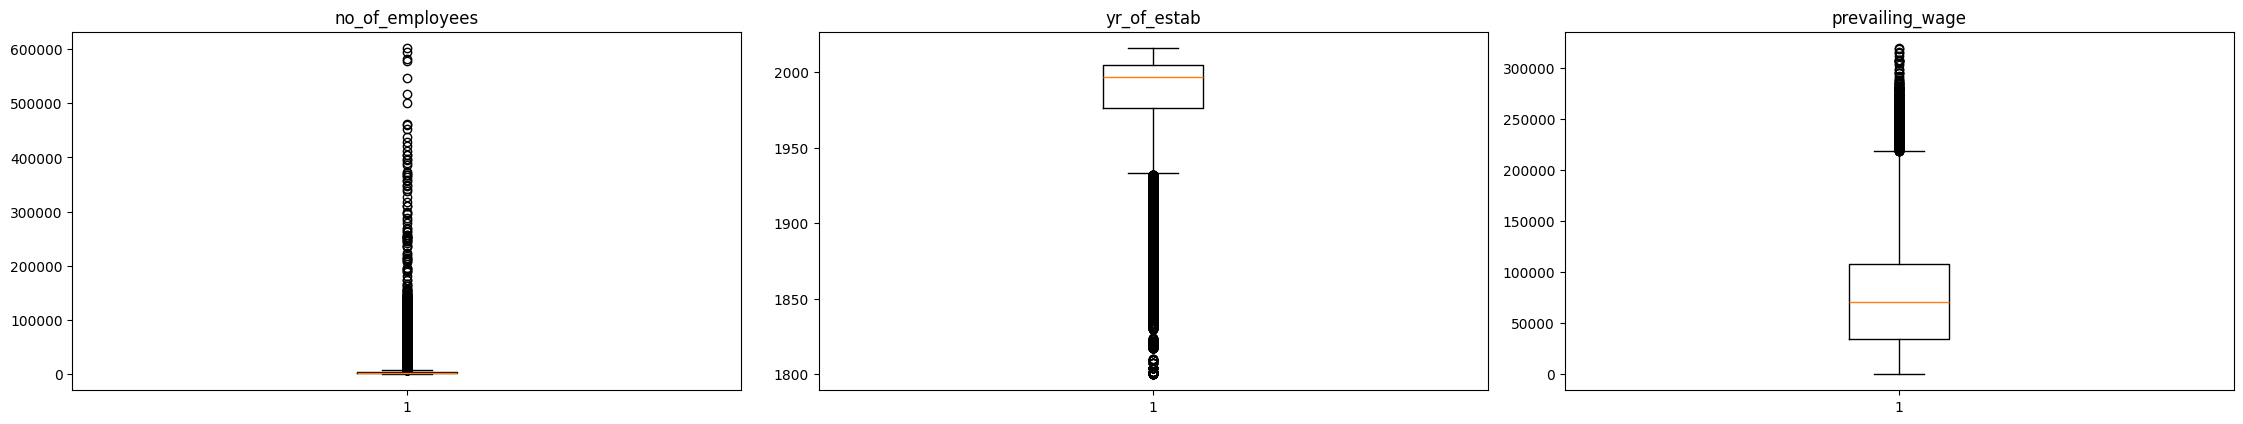

In [21]:
# Define numerical columns
numerical_col = easyvisa_copy_df.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(30, 20))

# Plot boxplots for each numerical column
for i, variable in enumerate(numerical_col):
    plt.subplot(5, 4, i + 1)
    plt.boxplot(easyvisa_copy_df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

**Observations**

* There are quite a few outliers in the data.
* However, we will not treat them as they are proper values.



#### Data Preparation for modeling


- **Here we want to predict which visa will be certified.**
- **Before we proceed to build a model, we'll have to encode categorical features.**
- **We'll split the data into train and test to be able to evaluate the model that we build on the train data.**
- **Due to the moderately imbalanced distribution of the dependent variable case_status (Certified accounting for 66.79% of the cases and Denied making up 33.21%), it is necessary to use the stratify option during train-test splitting to ensure that the class proportions are maintained across the training and testing datasets**


In [7]:
easyvisa_model_build_df = easyvisa_copy_df.copy()
easyvisa_copy_df['case_status'] = easyvisa_copy_df['case_status'].apply(lambda x : 1 if x=='Certified' else 0)

X = easyvisa_copy_df.drop(['case_status'],axis=1)
y = easyvisa_copy_df['case_status']

# creating dummy variables
X = pd.get_dummies(
    X,
    columns=X.select_dtypes(include=["object", "category"]).columns.tolist(),
    drop_first=True , dtype=float
)

# converting the input attributes into float type for modeling
X = X.astype(float)

In [8]:
# Splitting data into training and test set:
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.3, random_state=1,stratify=y)

print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (17836, 21)
Shape of test set :  (7644, 21)
Percentage of classes in training set:
case_status
1    0.667919
0    0.332081
Name: proportion, dtype: float64
Percentage of classes in test set:
case_status
1    0.667844
0    0.332156
Name: proportion, dtype: float64


**Observations**

* The training and test sets maintain the class distribution of the dependent variable, case_status, consistent with the original dataset. The Certified class makes up approximately 66.79% of both the training and test sets, while the Denied class accounts for around 33.21%. This consistency indicates that the stratified splitting process was successful in preserving the proportion of classes across both sets, ensuring a fair and representative evaluation of the model.

## Model evaluation criterion

### Model can make wrong predictions as:

1. Model predicts that the visa application will get certified but in reality, the visa application should get denied.
2. Model predicts that the visa application will not get certified but in reality, the visa application should get certified.

### Which case is more important?
* Both the cases are important as:

* If a visa is certified when it had to be denied a wrong employee will get the job position while US citizens will miss the opportunity to work on that position.

* If a visa is denied when it had to be certified the U.S. will lose a suitable human resource that can contribute to the economy.



### How to reduce the losses?

* `F1 Score` can be used a the metric for evaluation of the model, greater the F1  score higher are the chances of minimizing False Negatives and False Positives.
* We will use balanced class weights so that model focuses equally on both classes.

## Model Building

- We are going to build 5 ensemble models here - Bagging Clasifier, Random forest, AdaBoost Classifier, Gradient Boosting Classifier, and XGBoost Classifier.
- First, let's build these models with default parameters and then use hyperparameter tuning to optimize the model performance.
- We will calculate all three metrics - Accuracy, Precision , Recall and F1_Score but in the final selection of best fit model F1_Score metric will be considered


**Define functions to provide metric scores(accuracy,recall, precision and F1_Score) on train and test set and a function to show confusion matrix so that we do not have use the same code repetitively while evaluating models.**

In [9]:
# defining a function to compute different metrics to check performance of a classification model built using statsmodels
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [10]:
# defining a function to plot the confusion_matrix of a classification model

def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

### Decision Tree - Model Building and Hyperparameter Tuning

#### Decision Tree Model  - Default

In [11]:
# Initialize a DecisionTreeClassifier with default parameters
dtree_default = DecisionTreeClassifier(random_state=1)

# Fit the model to the training data
dtree_default.fit(X_train,y_train)

DecisionTreeClassifier(random_state=1)

Training performance:
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.664835  0.742801   0.752232  0.747487


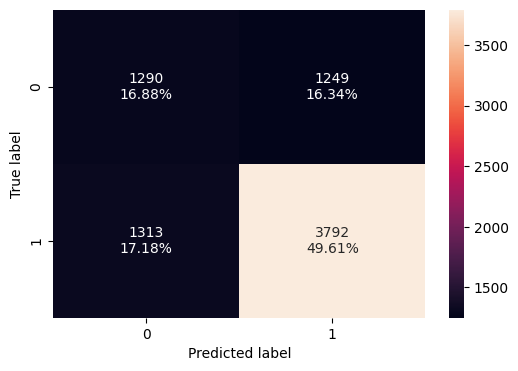

In [12]:
#Calculating different metrics
dtree_defautl_train_perf=model_performance_classification_sklearn(dtree_default,X_train,y_train)
print("Training performance:\n",dtree_defautl_train_perf)
dtree_defautl_test_perf=model_performance_classification_sklearn(dtree_default,X_test,y_test)
print("Testing performance:\n",dtree_defautl_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(dtree_default,X_test,y_test)

**Observations**

* Looking at the confusion matrix:

  1. True Positives (TP): 3792 (49.61%) - Correctly predicted certified visa applications.
  2. True Negatives (TN): 1290 (16.88%) - Correctly predicted denied visa applications.
  3. False Positives (FP): 1249 (16.34%) - Predicted certified but actually denied.
  4. False Negatives (FN): 1313 (17.18%) - Predicted denied but actually certified.

* The Default Decision Tree achieves perfect training performance (F1: 1.0), but its testing performance (F1: 74.75%) reflects a significant drop, indicating overfitting and limited generalization to unseen data.*italicized text*

#### Decision Tree Model  - With Class_weight

The default Decision Tree model exhibited overfitting, likely due to the class imbalance (66.7% Certified and 33.2% Denied). To address this, introducing the class_weight='balanced' parameter will adjust the impact of the minority class (Denied), making the model less biased and potentially reducing overfitting

In [13]:
# Initialize a DecisionTreeClassifier with class weights set to "balanced"
# The "balanced" setting adjusts weights inversely proportional to class frequencies
# This helps address class imbalance by giving more importance to the minority class
dtree_class_wgt = DecisionTreeClassifier(class_weight='balanced',random_state=1)

# Fit the model to the training data
dtree_class_wgt.fit(X_train,y_train)


DecisionTreeClassifier(class_weight='balanced', random_state=1)

Training performance:
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.654893  0.747502   0.738819  0.743135


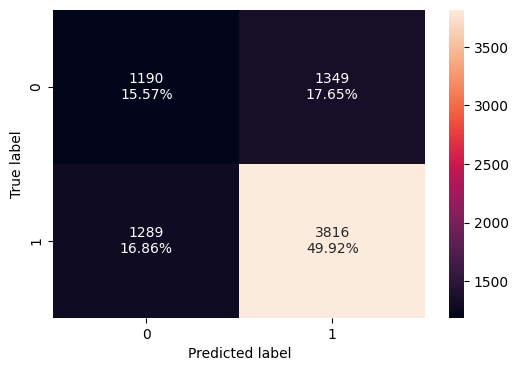

In [14]:
#Calculating different metrics
dtree_class_wgt_train_perf=model_performance_classification_sklearn(dtree_class_wgt,X_train,y_train)
print("Training performance:\n",dtree_class_wgt_train_perf)
dtree_class_wgt_test_perf=model_performance_classification_sklearn(dtree_class_wgt,X_test,y_test)
print("Testing performance:\n",dtree_class_wgt_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(dtree_class_wgt,X_test,y_test)

**Observations**

The Decision Tree with class weights achieves perfect training performance (F1: 1.0), indicating overfitting, but shows a slight improvement in test recall (74.75%) and an F1 score of 74.31% compared to the default model, reflecting persistent overfitting despite applying balanced class weights.


#### Hyperparameter Tuning - Decision Tree

In [15]:
# Initialize a DecisionTreeClassifier with class weights set to "balanced"
# The "balanced" setting adjusts weights inversely proportional to class frequencies
# This helps address class imbalance by giving more importance to the minority class
dtree_class_wgt_tuned = DecisionTreeClassifier(class_weight="balanced", random_state=1)

# Grid of parameters to choose from
param_grid = {
    'max_depth': np.arange(2,6),
    'min_samples_leaf': [1, 4, 7],
    'max_leaf_nodes' : [10, 15],
    'min_impurity_decrease': [0.0001,0.001]
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(dtree_class_wgt_tuned, param_grid, scoring=scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
dtree_class_wgt_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
dtree_class_wgt_tuned.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=5, max_leaf_nodes=10,
                       min_impurity_decrease=0.0001, random_state=1)

Training performance:
    Accuracy    Recall  Precision        F1
0  0.710193  0.725762   0.819681  0.769868
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.707483  0.726543   0.815344  0.768386


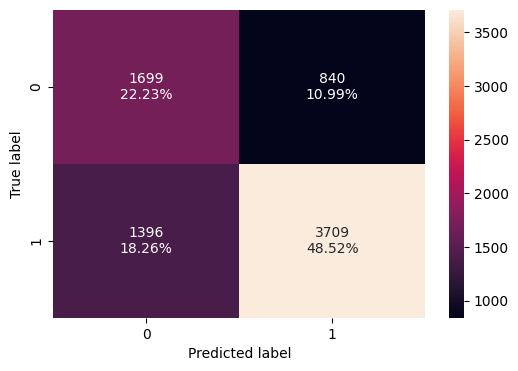

In [16]:
#Calculating different metrics
dtree_class_wgt_tuned_train_perf=model_performance_classification_sklearn(dtree_class_wgt_tuned,X_train,y_train)
print("Training performance:\n",dtree_class_wgt_tuned_train_perf)
dtree_class_wgt_tuned_test_perf=model_performance_classification_sklearn(dtree_class_wgt_tuned,X_test,y_test)
print("Testing performance:\n",dtree_class_wgt_tuned_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(dtree_class_wgt_tuned,X_test,y_test)

**Observations**

* The Hyperparameter-Tuned Decision Tree achieves balanced training performance (F1: 76.99%), addressing overfitting seen in prior models, and delivers consistent testing results with an F1 score of 76.84%. While it demonstrates improved precision (81.53%), reducing False Positives, the recall (72.65%) indicates a slight increase in False Negatives compared to the class-weighted model, reflecting a trade-off between precision and recall.

* Compared to the Default Decision Tree, the tuned version improves generalization with a higher testing F1 score (76.84% vs. 74.75%) and slightly better recall (72.65% vs. 74.28%), while also maintaining higher precision (81.53% vs. 75.22%), indicating more balanced performance and reduced overfitting.

### Hyperparameters for Building Bagging, Random Forest and Boosting models

**Note**

1. Sample parameter grids have been provided to do necessary hyperparameter tuning. These sample grids are expected to provide a balance between model performance improvement and execution time. One can extend/reduce the parameter grid based on execution time and system configuration.
  - Please note that if the parameter grid is extended to improve the model performance further, the execution time will increase

- For Gradient Boosting:

```
param_grid = {
    "init": [AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "subsample":[0.7,0.9],
    "max_features":[0.5,0.7,1],
}
```

- For Adaboost:

```
param_grid = {
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "base_estimator": [
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}
```

- For Bagging Classifier:

```
param_grid = {
    'max_samples': [0.8,0.9,1],
    'max_features': [0.7,0.8,0.9],
    'n_estimators' : [30,50,70],
}
```
- For Random Forest:

```
param_grid = {
    "n_estimators": [50,110,25],
    "min_samples_leaf": np.arange(1, 4),
    "max_features": [np.arange(0.3, 0.6, 0.1),'sqrt'],
    "max_samples": np.arange(0.4, 0.7, 0.1)
}
```

- For Decision Trees:

```
param_grid = {
    'max_depth': np.arange(2,6),
    'min_samples_leaf': [1, 4, 7],
    'max_leaf_nodes' : [10, 15],
    'min_impurity_decrease': [0.0001,0.001]
}
```

- For XGBoost:

```
param_grid={'n_estimators':np.arange(50,110,25),
            'scale_pos_weight':[1,2,5],
            'learning_rate':[0.01,0.1,0.05],
            'gamma':[1,3],
            'subsample':[0.7,0.9]
}
```

### Building Bagging and Random Forest models

#### Bagging - Model Building and Hyperparameter Tuning

##### Bagging Classifier

In [17]:
# Initialize a RandomForestClassifier with  with default parameters
# base_estimator for bagging classifier is a decision tree by default
bagging_estimator_default =BaggingClassifier(random_state=1)

# Fit the model to the training data
bagging_estimator_default.fit(X_train,y_train)

BaggingClassifier(random_state=1)

Training performance:
    Accuracy    Recall  Precision        F1
0  0.985198  0.985982    0.99181  0.988887
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.691523  0.764153   0.771711  0.767913


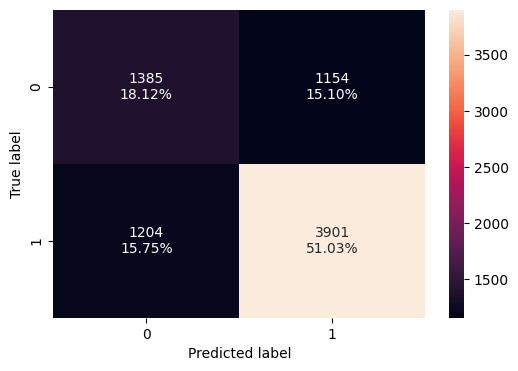

In [24]:
#Calculating different metrics
bagging_estimator_default_train_perf=model_performance_classification_sklearn(bagging_estimator_default,X_train,y_train)
print("Training performance:\n",bagging_estimator_default_train_perf)
bagging_estimator_default_test_perf=model_performance_classification_sklearn(bagging_estimator_default,X_test,y_test)
print("Testing performance:\n",bagging_estimator_default_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(bagging_estimator_default,X_test,y_test)

**Observations**

* Default Bagging Classifier Performance: The Default Bagging Classifier achieves strong training performance (F1: 98.89%), indicating slight overfitting, and delivers a testing F1 score of 76.79%. It demonstrates good recall (76.42%), effectively identifying True Positives, and decent precision (77.17%), balancing False Positives and True Positives.

* Comparison with Default Decision Tree: Compared to the Default Decision Tree, the Bagging Classifier shows a notable improvement in testing F1 score (76.79% vs. 74.75%) and recall (76.42% vs. 74.28%), reducing False Negatives more effectively. Additionally, the Bagging Classifier achieves higher precision (77.17% vs. 75.22%), reflecting better control over False Positives.

##### Hyperparameter Tuning - Bagging Classifier

In [19]:
# Initialize a DecisionTreeClassifier as the base estimator with class weights set to "balanced"
# This ensures the tree gives more focus to the minority class during training
base_estimator = DecisionTreeClassifier(class_weight="balanced", random_state=1)

# Initialize a BaggingClassifier using the DecisionTreeClassifier as the base estimator
# Bagging helps reduce variance by training multiple models on different subsets of the data
bagging_estimator_tuned = BaggingClassifier(estimator=base_estimator, random_state=1)

# Grid of parameters to choose from
param_grid = {
    'max_samples': [0.8,0.9,1],
    'max_features': [0.7,0.8,0.9],
    'n_estimators' : [30,50,70],
}


# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(bagging_estimator_tuned, param_grid, scoring=scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
bagging_estimator_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
bagging_estimator_tuned.fit(X_train, y_train)


BaggingClassifier(estimator=DecisionTreeClassifier(class_weight='balanced',
                                                   random_state=1),
                  max_features=0.7, max_samples=0.8, n_estimators=70,
                  random_state=1)

Training performance:
    Accuracy    Recall  Precision        F1
0  0.998598  0.999916   0.997989  0.998952
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.723312  0.891283   0.744681  0.811413


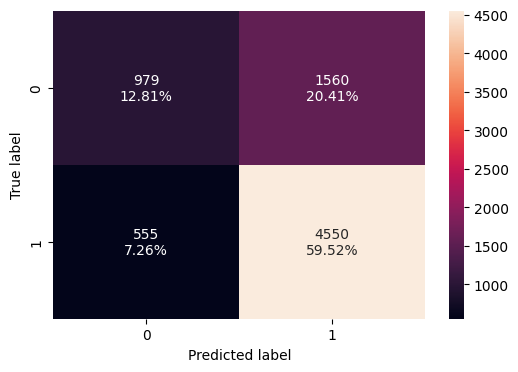

In [20]:
#Calculating different metrics
bagging_estimator_tuned_train_perf=model_performance_classification_sklearn(bagging_estimator_tuned,X_train,y_train)
print("Training performance:\n",bagging_estimator_tuned_train_perf)
bagging_estimator_tuned_test_perf=model_performance_classification_sklearn(bagging_estimator_tuned,X_test,y_test)
print("Testing performance:\n",bagging_estimator_tuned_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(bagging_estimator_tuned,X_test,y_test)

**Observations**

1. The Tuned Bagging Classifier achieves strong performance with an F1 score of 81.14% on the test set and 99.90% on the training set, indicating slight overfitting. It demonstrates high recall (89.13%) on the test set, effectively minimizing False Negatives, and good precision (74.47%), balancing True Positives and False Positives.


2. Compared to the Tuned Decision Tree, the Tuned Bagging Classifier achieves a higher testing F1 score (81.14% vs. 76.84%) and recall (89.13% vs. 72.65%), significantly reducing False Negatives. However, the Decision Tree achieves better precision (81.53% vs. 74.47%), indicating more control over False Positives.

3. When compared to the Default Bagging Classifier, the Tuned Bagging Classifier shows improved generalization with a higher testing F1 score (81.14% vs. 76.79%) and recall (89.13% vs. 76.42%), effectively minimizing False Negatives. Precision, however, decreases slightly (74.47% vs. 77.17%), reflecting a trade-off for better recall.

#### Random Forest - Model Building and Hyperparameter Tuning

##### Random Forest

In [21]:
# Initialize a RandomForestClassifier with  with default parameters
rf_estimator_default = RandomForestClassifier(random_state=1)

# Fit the model to the training data
rf_estimator_default.fit(X_train,y_train)

RandomForestClassifier(random_state=1)

Training performance:
    Accuracy    Recall  Precision        F1
0  0.999944  0.999916        1.0  0.999958
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.720827  0.832125   0.768869  0.799247


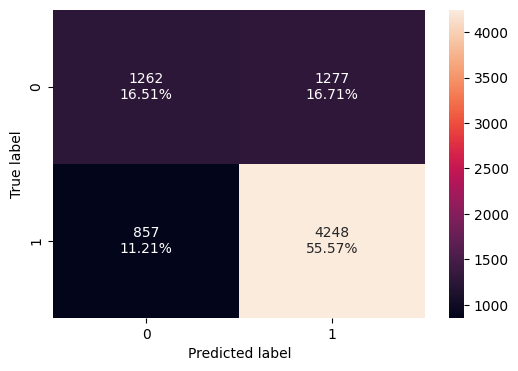

In [45]:
#Calculating different metrics
rf_estimator_default_train_perf=model_performance_classification_sklearn(rf_estimator_default,X_train,y_train)
print("Training performance:\n",rf_estimator_default_train_perf)
rf_estimator_default_test_perf=model_performance_classification_sklearn(rf_estimator_default,X_test,y_test)
print("Testing performance:\n",rf_estimator_default_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(rf_estimator_default, X_test, y_test)

**Observations**

1. The Random Forest (default) achieves near-perfect training performance (F1: 99.99%), reflecting overfitting, and delivers a strong testing F1 score of 79.92%, with improved recall (83.21%) minimizing False Negatives and good precision (76.89%) balancing False Positives.

2. Improves testing F1 score (79.92% vs. 76.79%) and recall (83.21% vs. 76.42%) compared to the Default Bagging Classifier, with slightly better precision (76.89% vs. 77.17%), reflecting a trade-off favoring recall over precision.

3. Outperforms the Default Decision Tree in testing F1 score (79.92% vs. 74.75%), with higher recall (83.21% vs. 74.28%) and precision (76.89% vs. 75.22%), demonstrating superior generalization and error handling.

##### Hyperparameter Tuning - Random Forest

In [23]:
# Initialize a RandomForestClassifier with class weights set to "balanced"
# This adjusts weights inversely proportional to class frequencies in the training data
rf_estimator_tuned = RandomForestClassifier(class_weight="balanced", random_state=1)

# Grid of parameters to choose from
param_grid = {
    "n_estimators": [50,110,25],
    "min_samples_leaf": np.arange(1, 4),
    "max_features": [np.arange(0.3, 0.6, 0.1),'sqrt'],
    "max_samples": np.arange(0.4, 0.7, 0.1)
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(rf_estimator_tuned, param_grid, scoring=scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_estimator_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
rf_estimator_tuned.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_samples=0.4,
                       n_estimators=110, random_state=1)

Training performance:
    Accuracy    Recall  Precision        F1
0  0.917975  0.975153   0.908714  0.940762
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.731293  0.864643   0.764064  0.811248


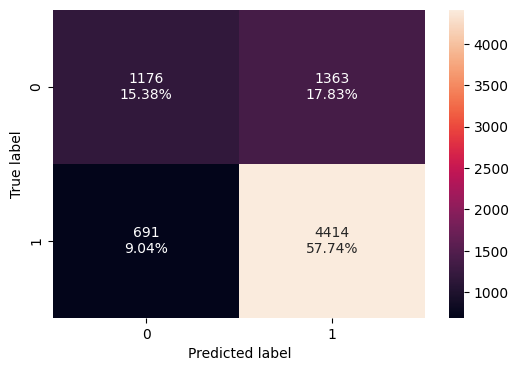

In [27]:
#Calculating different metrics
rf_estimator_tuned_train_perf=model_performance_classification_sklearn(rf_estimator_tuned,X_train,y_train)
print("Training performance:\n",rf_estimator_tuned_train_perf)
rf_estimator_tuned_test_perf=model_performance_classification_sklearn(rf_estimator_tuned,X_test,y_test)
print("Testing performance:\n",rf_estimator_tuned_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(rf_estimator_tuned,X_test,y_test)

**Observations**

1. The Random Forest (Tuned) achieves strong training performance with an F1 score of 94.08%, reflecting slight overfitting, and delivers robust testing performance with an F1 score of 81.12%. It demonstrates high recall (86.46%), effectively reducing False Negatives, and good precision (76.41%), balancing True Positives and False Positives.

2. The Tuned Random Forest performs similarly to the Tuned Bagging Classifier in terms of testing F1 score (81.12% vs. 81.14%). However, the Bagging Classifier achieves higher recall (89.13% vs. 86.46%), indicating better handling of False Negatives, while the Random Forest achieves slightly higher precision (76.41% vs. 74.47%), reflecting better control over False Positives.

3. The Tuned Random Forest outperforms the Tuned Decision Tree in testing recall (86.46% vs. 72.65%) and F1 score (81.12% vs. 76.84%), reducing False Negatives more effectively. However, the Decision Tree achieves better precision (81.53% vs. 76.41%), showing better control over False Positives.

4. Compared to the Default Random Forest, the Tuned Random Forest achieves a slightly improved testing F1 score (81.12% vs. 79.92%) and recall (86.46% vs. 83.21%), reducing False Negatives more effectively. Precision is slightly lower (76.41% vs. 76.89%), reflecting a trade-off in balancing precision and recall.

### Building Boosting models

#### AdaBoost Classifier - Model Building and Hyperparameter Tuning

##### Adaboost Classifier

In [28]:
# Initialize an AdaBoostClassifier with default parameters
abc_estimator_default = AdaBoostClassifier(random_state=1)

# Fit the model to the training data
abc_estimator_default.fit(X_train,y_train)

AdaBoostClassifier(random_state=1)

Training performance:
    Accuracy    Recall  Precision       F1
0  0.738226  0.887182   0.760688  0.81908
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.734301  0.885015   0.757799  0.816481


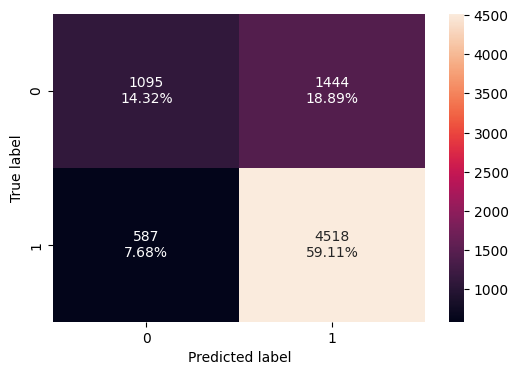

In [29]:
#Calculating different metrics
abc_estimator_default_train_perf=model_performance_classification_sklearn(abc_estimator_default,X_train,y_train)
print("Training performance:\n",abc_estimator_default_train_perf)
abc_estimator_default_test_perf=model_performance_classification_sklearn(abc_estimator_default,X_test,y_test)
print("Testing performance:\n",abc_estimator_default_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(abc_estimator_default,X_test,y_test)

**Observations**

1. The AdaBoost (default) model achieves balanced performance with an F1 score of 81.91% on training and 81.65% on testing, showing strong recall (88.50%) to minimize False Negatives and precision (75.78%) to balance True Positives and False Positives.

2. Compared to the Default Decision Tree, AdaBoost significantly improves recall (88.50% vs. 74.28%) and F1 score (81.65% vs. 74.75%), effectively reducing False Negatives. Additionally, AdaBoost achieves slightly better precision (75.78% vs. 75.22%), reflecting better control over False Positives.

3. When compared to the Default Bagging Classifier, AdaBoost outperforms in F1 score (81.65% vs. 76.79%) and recall (88.50% vs. 76.42%), minimizing False Negatives more effectively. However, the Bagging Classifier achieves better precision (77.17% vs. 75.78%), reflecting stronger control over False Positives. This highlights a trade-off between recall and precision, with each model excelling in different aspects.

4. Against the Default Random Forest, AdaBoost delivers an improved F1 score (81.65% vs. 79.92%) with higher recall (88.50% vs. 83.21%), prioritizing False Negative reduction. However, the Random Forest achieves better precision (76.89% vs. 75.78%), balancing False Positives and True Positives more effectively. Both models generalize well but address different error priorities.

##### Hyperparameter Tuning - Adaboost Classifier

In [30]:
# Initialize an AdaBoostClassifier with default parameters
abc_estimator_tuned = AdaBoostClassifier(random_state=1)


# Grid of parameters to choose from
param_grid = {
    "n_estimators": np.arange(50,110,25),
    "learning_rate": [0.01,0.1,0.05],
    "estimator": [
        DecisionTreeClassifier(max_depth=2, random_state=1),
        DecisionTreeClassifier(max_depth=3, random_state=1),
    ],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(estimator=abc_estimator_tuned, param_grid=param_grid, scoring=scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
abc_estimator_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
abc_estimator_tuned.fit(X_train, y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=3,
                                                    random_state=1),
                   learning_rate=0.1, random_state=1)

Training performance:
    Accuracy    Recall  Precision        F1
0  0.754317  0.889365   0.775679  0.828641
Testing performance:
    Accuracy    Recall  Precision        F1
0   0.74045  0.881293   0.765527  0.819341


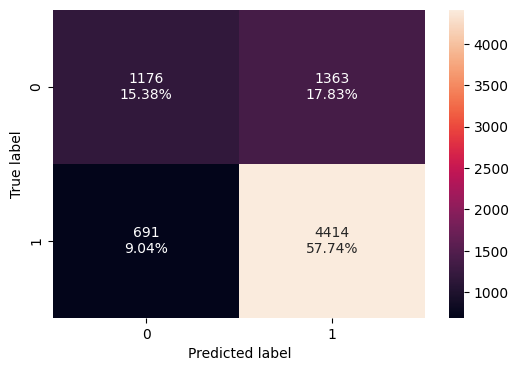

In [31]:
#Calculating different metrics
abc_estimator_tuned_train_perf=model_performance_classification_sklearn(abc_estimator_tuned,X_train,y_train)
print("Training performance:\n",abc_estimator_tuned_train_perf)
abc_estimator_tuned_test_perf=model_performance_classification_sklearn(abc_estimator_tuned,X_test,y_test)
print("Testing performance:\n",abc_estimator_tuned_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(rf_estimator_tuned,X_test,y_test)

**Observations**

1. The Tuned AdaBoost model achieves balanced performance with an F1 score of 82.86% on training and 81.93% on testing, showing strong recall (88.13%) to minimize False Negatives and good precision (76.55%) to balance True Positives and False Positives.

2. Compared to the Tuned Decision Tree, AdaBoost significantly improves recall (88.13% vs. 72.65%) and F1 score (81.93% vs. 76.84%), effectively reducing False Negatives. However, the Decision Tree achieves better precision (81.53% vs. 76.55%), reflecting better control over False Positives.

3. When compared to the Tuned Bagging Classifier, AdaBoost delivers a slightly higher F1 score (81.93% vs. 81.14%) and recall (88.13% vs. 87.26%), with slightly higher precision (76.55% vs. 75.89%), maintaining a strong overall balance.

4. Against the Tuned Random Forest, AdaBoost achieves a slightly higher F1 score (81.93% vs. 81.12%) and recall (88.13% vs. 86.46%). Additionally, AdaBoost achieves slightly better precision (76.55% vs. 76.41%), reflecting a marginally better control over False Positives. Both models generalize well but prioritize different aspects of error reduction.

5. When compared to the Default AdaBoost, the Tuned AdaBoost achieves a slightly higher F1 score (81.93% vs. 81.65%) and comparable recall (88.13% vs. 88.50%), with improved precision (76.55% vs. 75.78%), reflecting better control over False Positives while maintaining strong generalization

#### Gradient Boosting Classifier - Model Building and Hyperparameter Tuning

##### Gradient Boosting Classifier

In [32]:
# Initialize a GradientBoostingClassifier with default parameters
# The model uses an internal DecisionTreeClassifier (with max_depth=3 by default) as the base estimator
gbc_estimator_default = GradientBoostingClassifier(random_state=1)

# Fit the model to the training data
gbc_estimator_default.fit(X_train,y_train)

GradientBoostingClassifier(random_state=1)

Training performance:
    Accuracy   Recall  Precision        F1
0  0.758802  0.88374   0.783042  0.830349
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.744767  0.876004   0.772366  0.820927


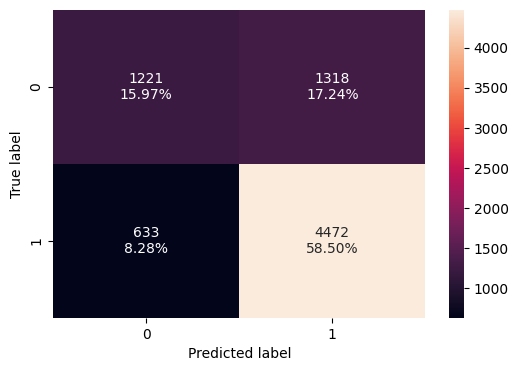

In [33]:
#Calculating different metrics
gbc_estimator_default_train_perf=model_performance_classification_sklearn(gbc_estimator_default,X_train,y_train)
print("Training performance:\n",gbc_estimator_default_train_perf)
gbc_estimator_default_test_perf=model_performance_classification_sklearn(gbc_estimator_default,X_test,y_test)
print("Testing performance:\n",gbc_estimator_default_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(gbc_estimator_default,X_test,y_test)


**Observations**

1. The Gradient Boosting Classifier (default) achieves balanced performance with an F1 score of 83.03% on training and 82.09% on testing, demonstrating strong recall (87.60%) for minimizing False Negatives and good precision (77.24%) for balancing True and False Positives. The consistent performance across training and testing suggests good generalization.

2. Compared to the Default Decision Tree, Gradient Boosting significantly improves recall (87.60% vs. 74.28%) and F1 score (82.09% vs. 74.75%), indicating better performance in reducing False Negatives. Additionally, it achieves better precision (77.24% vs. 75.22%), reflecting superior generalization.

3. When compared to the Default Bagging Classifier, Gradient Boosting outperforms in F1 score (82.09% vs. 76.79%) and recall (87.60% vs. 76.42%), effectively minimizing False Negatives. It also achieves slightly higher precision (77.24% vs. 77.17%), resulting in more balanced performance overall.

4. Against the Default Random Forest, Gradient Boosting delivers a slightly higher F1 score (82.09% vs. 79.92%) and recall (87.60% vs. 83.21%), demonstrating better False Negative reduction. Additionally, Gradient Boosting achieves slightly better precision (77.24% vs. 76.89%), reflecting superior control over False Positives.

5. Compared to the Default AdaBoost, Gradient Boosting achieves a slightly higher F1 score (82.09% vs. 81.65%) but slightly lower recall (87.60% vs. 88.50%). However, Gradient Boosting demonstrates better precision (77.24% vs. 75.78%), reflecting improved control over False Positives. Both models generalize well but prioritize different error types.

##### Hyperparameter Tuning - Gradient Boosting Classifier

**Observations**

In [34]:
# Define GradientBoostingClassifier with default internal DecisionTreeClassifier
gbc_estimator_tuned = GradientBoostingClassifier(random_state=1)

# Grid of parameters for tuning the GradientBoostingClassifier
param_grid = {
    "n_estimators": np.arange(50, 110, 25),  # Number of trees
    "learning_rate": [0.01, 0.1, 0.05],     # Step size
    "subsample": [0.7, 0.9],                # Fraction of samples used for fitting
    "max_features": [0.5, 0.7, 1],          # Features used at each split
    "max_depth": [3, 4, 5],                 # Depth of the internal DecisionTreeClassifier
}



# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(gbc_estimator_tuned, param_grid, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
gbc_estimator_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
gbc_estimator_tuned.fit(X_train, y_train)


GradientBoostingClassifier(learning_rate=0.05, max_depth=5, max_features=0.7,
                           n_estimators=50, random_state=1, subsample=0.9)

Training performance:
    Accuracy    Recall  Precision        F1
0  0.760148  0.891463   0.780595  0.832354
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.743721  0.880313   0.769257  0.821047


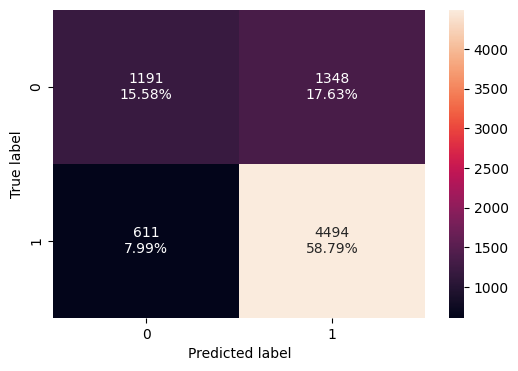

In [41]:
#Calculating different metrics
gbc_estimator_tuned_train_perf=model_performance_classification_sklearn(gbc_estimator_tuned,X_train,y_train)
print("Training performance:\n",gbc_estimator_tuned_train_perf)
gbc_estimator_tuned_test_perf=model_performance_classification_sklearn(gbc_estimator_tuned,X_test,y_test)
print("Testing performance:\n",gbc_estimator_tuned_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(gbc_estimator_tuned,X_test,y_test)

**Observations**

1. The Tuned Gradient Boosting Classifier achieves balanced performance with an F1 score of 83.24% on training and 82.10% on testing. It demonstrates strong recall (88.03%) for minimizing False Negatives and good precision (76.93%) for balancing True Positives and False Positives. The consistent performance across training and testing highlights good generalization.

2. Compared to the Tuned Decision Tree, the Tuned Gradient Boosting Classifier outperforms in both F1 score (82.10% vs. 76.84%) and recall (88.03% vs. 72.65%), effectively reducing False Negatives. However, the Decision Tree achieves better precision (81.53% vs. 76.93%), reflecting slightly better control over False Positives.

3. When compared to the Tuned Bagging Classifier, the Tuned Gradient Boosting Classifier delivers a higher F1 score (82.10% vs. 81.14%) and recall (88.03% vs. 87.26%), along with slightly better precision (76.93% vs. 75.89%), indicating a more balanced performance overall.

4. Against the Tuned AdaBoost, the Tuned Gradient Boosting Classifier achieves a higher F1 score (82.10% vs. 81.93%) and comparable recall (88.03% vs. 88.13%). However, it demonstrates slightly better precision (76.93% vs. 76.55%), reflecting better control over False Positives. Both models generalize well but have minor differences in balancing errors.

5. When compared to the Tuned Random Forest, the Tuned Gradient Boosting Classifier achieves a higher F1 score (82.10% vs. 81.12%) and recall (88.03% vs. 86.46%). Additionally, Gradient Boosting demonstrates slightly better precision (76.93% vs. 76.41%), maintaining strong overall balance between False Positives and False Negatives. Both models perform well with subtle differences in prioritization.

6. Compared to the Default Gradient Boosting, the Tuned Gradient Boosting Classifier achieves slightly better recall (88.03% vs. 87.60%) but slightly lower precision (76.93% vs. 77.24%), resulting in a marginal improvement in F1 score (82.10% vs. 82.09%). Both models generalize well, but tuning slightly enhances recall while maintaining overall balance.



#### XGBoost Classifier - Model Building and Hyperparameter Tuning

##### XGBoost Classifier

In [35]:
# Initialize an XGBClassifier with tuned parameters
# The eval_metric is set to 'logloss', which is suitable for binary or multi-class classification
# random_state ensures reproducibility of results
xgb_estimator_default = XGBClassifier(random_state=1, eval_metric='logloss')

# Fit the model to the training data
xgb_estimator_default.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=1, ...)

Training performance:
    Accuracy    Recall  Precision        F1
0  0.850807  0.935952   0.854537  0.893394
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.729984  0.851518   0.768972  0.808143


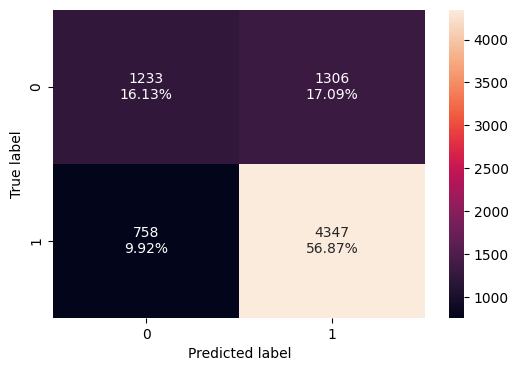

In [36]:
#Calculating different metrics
xgb_estimator_default_train_perf=model_performance_classification_sklearn(xgb_estimator_default,X_train,y_train)
print("Training performance:\n",xgb_estimator_default_train_perf)
xgb_estimator_default_test_perf=model_performance_classification_sklearn(xgb_estimator_default,X_test,y_test)
print("Testing performance:\n",xgb_estimator_default_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(xgb_estimator_default,X_test,y_test)

**Observations**

1. The Default XGBoost Classifier achieves strong training performance with an F1 score of 89.33%, reflecting moderate overfitting, and delivers an F1 score of 80.81% on testing. It demonstrates strong recall (85.15%), effectively minimizing False Negatives, and good precision (76.90%), balancing True Positives and False Positives. The model generalizes well across training and testing datasets.

2. Compared to the Default Bagging Classifier, XGBoost achieves a higher F1 score (80.81% vs. 76.79%) and recall (85.15% vs. 76.42%), significantly reducing False Negatives. However, Bagging achieves slightly better precision (77.17% vs. 76.90%), reflecting a marginally stronger ability to control False Positives.

3. When compared to the Default Random Forest, XGBoost shows a slightly higher F1 score (80.81% vs. 79.92%) and better recall (85.15% vs. 83.21%), effectively reducing False Negatives. However, Random Forest achieves comparable precision (76.89% vs. 76.90%), indicating similar control over False Positives.

4. Against the Default AdaBoost, XGBoost achieves a slightly lower F1 score (80.81% vs. 81.65%) and slightly lower recall (85.15% vs. 88.50%), with better precision (76.90% vs. 75.78%). While XGBoost improves precision, AdaBoost balances precision and recall more effectively, as reflected in its higher F1 score.

5. Compared to the Default Decision Tree, XGBoost significantly improves F1 score (80.81% vs. 74.75%) and recall (85.15% vs. 74.28%), effectively reducing False Negatives. Additionally, it achieves better precision (76.90% vs. 75.22%), reflecting superior generalization and error handling.





##### Hyperparameter Tuning - XGBoost Classifier

In [38]:
# Initialize an XGBClassifier with tuned parameters
# The eval_metric is set to 'logloss', which is suitable for binary or multi-class classification
xgb_estimator_tuned = XGBClassifier(random_state=1, eval_metric='logloss')

# Grid of parameters to choose from
param_grid={'n_estimators':np.arange(50,110,25),
            'scale_pos_weight':[1,2,5],
            'learning_rate':[0.01,0.1,0.05],
            'gamma':[1,3],
            'subsample':[0.7,0.9]
}


# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(xgb_estimator_tuned, param_grid, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
xgb_estimator_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
xgb_estimator_tuned.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=3, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.05, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=50,
              n_jobs=None, num_parallel_tree=None, random_state=1, ...)

Training performance:
    Accuracy    Recall  Precision        F1
0  0.761942  0.891799   0.782269  0.833451
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.744244  0.879726   0.770062  0.821249


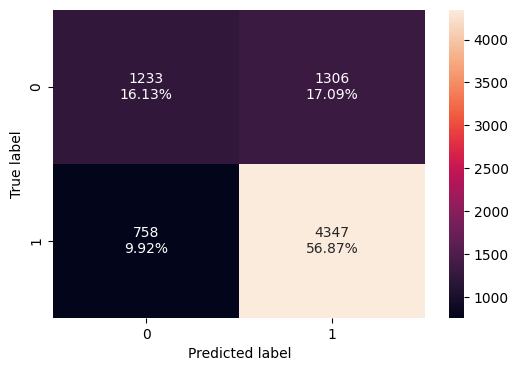

In [39]:
#Calculating different metrics
xgb_estimator_tuned_train_perf=model_performance_classification_sklearn(xgb_estimator_tuned,X_train,y_train)
print("Training performance:\n",xgb_estimator_tuned_train_perf)
xgb_estimator_tuned_test_perf=model_performance_classification_sklearn(xgb_estimator_tuned,X_test,y_test)
print("Testing performance:\n",xgb_estimator_tuned_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(xgb_estimator_default,X_test,y_test)

**Observations**

1. The Tuned XGBoost Classifier delivers strong performance with an F1 score of 83.35% on training and 82.12% on testing, demonstrating good generalization. It achieves high recall (87.97%) on testing, minimizing False Negatives, and solid precision (77.01%), balancing True Positives and False Positives effectively.

2. Compared to the Tuned Decision Tree, the Tuned XGBoost outperforms in F1 score (82.12% vs. 76.84%) and recall (87.97% vs. 72.65%), significantly reducing False Negatives. However, the Decision Tree achieves better precision (81.53% vs. 77.01%), indicating stronger control over False Positives.

3. When compared to the Tuned Bagging Classifier, the Tuned XGBoost achieves a slightly higher F1 score (82.12% vs. 81.14%) and recall (87.97% vs. 87.26%). However, Bagging shows slightly better precision (77.17% vs. 77.01%), reflecting marginally stronger control over False Positives.

4. Against the Tuned AdaBoost, the Tuned XGBoost achieves a slightly higher F1 score (82.12% vs. 81.93%) and slightly lower recall (87.97% vs. 88.13%). However, XGBoost demonstrates slightly better precision (77.01% vs. 76.55%), reflecting marginally stronger control over False Positives.

5. When compared to the Tuned Gradient Boosting, the Tuned XGBoost achieves comparable F1 scores (82.12% vs. 82.10%) and slightly lower recall (87.97% vs. 88.03%), with slightly better precision (77.01% vs. 76.93%). Both models generalize well, with minimal differences in balancing errors.

6. Compared to the Tuned Random Forest, the Tuned XGBoost achieves a slightly higher F1 score (82.12% vs. 81.14%) and recall (87.97% vs. 86.46%). However, Random Forest demonstrates slightly better precision (77.12% vs. 77.01%), reflecting marginally stronger control over False Positives in certain cases. Both models show strong generalization with subtle differences in prioritizing error types.

##  Will tuning the hyperparameters improve the model performance?

**Checking the impact of hyperparameters on the performance of the models**

In [46]:
# training performance comparison

models_train_comp_df = pd.concat(
[
dtree_defautl_train_perf.T,
dtree_class_wgt_tuned_train_perf.T,
bagging_estimator_default_train_perf.T,
bagging_estimator_tuned_train_perf.T,
rf_estimator_default_train_perf.T,
rf_estimator_tuned_train_perf.T,
abc_estimator_default_train_perf.T,
abc_estimator_tuned_train_perf.T,
gbc_estimator_default_train_perf.T,
gbc_estimator_tuned_train_perf.T,
xgb_estimator_default_train_perf.T,
xgb_estimator_tuned_train_perf.T
],axis=1
)

models_train_comp_df.columns = [
    "Decision Tree default",
    "Decision Tree Tuned",
    "Bagging Classifier default",
    "Bagging Classifier Tuned",
    "Random Forest default",
    "Random Forest Tuned",
    "Adaboost Classifier default",
    "Adabosst Classifier Tuned ",
    "Gradient Boost Classifier default",
    "Gradient Boost Classifier Tuned",
    "XGBoost Classifier default",
    "XGBoost Classifier Tuned",
]

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree default,Decision Tree Tuned,Bagging Classifier default,Bagging Classifier Tuned,Random Forest default,Random Forest Tuned,Adaboost Classifier default,Adabosst Classifier Tuned,Gradient Boost Classifier default,Gradient Boost Classifier Tuned,XGBoost Classifier default,XGBoost Classifier Tuned
Accuracy,1.0,0.710193,0.985198,0.998598,0.999944,0.917975,0.738226,0.754317,0.758802,0.760148,0.850807,0.761942
Recall,1.0,0.725762,0.985982,0.999916,0.999916,0.975153,0.887182,0.889365,0.883740,0.891463,0.935952,0.891799
Precision,1.0,0.819681,0.991810,0.997989,1.000000,0.908714,0.760688,0.775679,0.783042,0.780595,0.854537,0.782269
F1,1.0,0.769868,0.988887,0.998952,0.999958,0.940762,0.819080,0.828641,0.830349,0.832354,0.893394,0.833451


In [53]:
# testing performance comparison

models_test_comp_df = pd.concat(
[
dtree_defautl_test_perf.T,
dtree_class_wgt_tuned_test_perf.T,
bagging_estimator_default_test_perf.T,
bagging_estimator_tuned_test_perf.T,
rf_estimator_default_test_perf.T,
rf_estimator_tuned_test_perf.T,
abc_estimator_default_test_perf.T,
abc_estimator_tuned_test_perf.T,
gbc_estimator_default_test_perf.T,
gbc_estimator_tuned_test_perf.T,
xgb_estimator_default_test_perf.T,
xgb_estimator_tuned_test_perf.T
],axis=1
)

models_test_comp_df.columns = [
    "Decision Tree default",
    "Decision Tree Tuned",
    "Bagging Classifier default",
    "Bagging Classifier Tuned",
    "Random Forest default",
    "Random Forest Tuned",
    "Adaboost Classifier default",
    "Adabosst Classifier Tuned ",
    "Gradient Boost Classifier default",
    "Gradient Boost Classifier Tuned",
    "XGBoost Classifier default",
    "XGBoost Classifier Tuned",
]

print("Testing performance comparison:")
models_test_comp_df

Testing performance comparison:


,Decision Tree default,Decision Tree Tuned,Bagging Classifier default,Bagging Classifier Tuned,Random Forest default,Random Forest Tuned,Adaboost Classifier default,Adabosst Classifier Tuned,Gradient Boost Classifier default,Gradient Boost Classifier Tuned,XGBoost Classifier default,XGBoost Classifier Tuned
Accuracy,0.664835,0.707483,0.691523,0.723312,0.720827,0.731293,0.734301,0.740450,0.744767,0.743721,0.729984,0.744244
Recall,0.742801,0.726543,0.764153,0.891283,0.832125,0.864643,0.885015,0.881293,0.876004,0.880313,0.851518,0.879726
Precision,0.752232,0.815344,0.771711,0.744681,0.768869,0.764064,0.757799,0.765527,0.772366,0.769257,0.768972,0.770062
F1,0.747487,0.768386,0.767913,0.811413,0.799247,0.811248,0.816481,0.819341,0.820927,0.821047,0.808143,0.821249


Tuning with hyperparameters adjusts model parameters to achieve better performance by balancing training and testing scores, reducing overfitting, and optimizing generalization. In the current scenario, the results below provide clear evidence of improvements in most models' testing F1 scores, recall, and precision, confirming the effectiveness of hyperparameter tuning.

1. Decision Tree

  * Training Performance: Hyperparameter tuning significantly reduced overfitting, lowering the training F1 score from 1.0 to 0.7699. Recall decreased from 1.0 to 0.7258, and precision dropped from 1.0 to 0.8197, reflecting a more realistic fit to the data.

  * Testing Performance: The testing F1 score improved slightly from 0.7475 to 0.7684, with precision increasing significantly from 0.7522 to 0.8153. However, recall decreased slightly from 0.7428 to 0.7265, indicating a trade-off between minimizing False Positives and False Negatives.

  * Generalization: The differences in F1 (25.25% to 0.54%), recall (25.72% to 0.07%), and precision (24.78% to 0.45%) between training and testing metrics significantly reduced with tuning, indicating excellent generalization after hyperparameter tuning.

2. Bagging Classifier

  * Training Performance: Tuning slightly increased overfitting, raising the training F1 score from 0.9889 to 0.9989. Recall increased from 0.9860 to 0.9999, indicating memorization of the training data. Precision also increased from 0.9918 to 0.9980.

  * Testing Performance: The testing F1 score improved from 0.7679 to 0.8114, with recall increasing significantly from 0.7642 to 0.8913, effectively reducing False Negatives. Precision decreased slightly from 0.7717 to 0.7447, indicating a trade-off.

  * Generalization: The differences in F1 (22.10% to 18.75%), recall (22.18% to 10.86%), and precision (22.01% to 25.33%) between training and testing metrics show persistent overfitting despite improvements in testing recall.

3. Random Forest:

  * Training Performance: Hyperparameter tuning reduced overfitting, lowering the training F1 score from 0.9999 to 0.9408. Recall decreased slightly from 0.9999 to 0.9752, and precision dropped from 1.0 to 0.9087.

  *  Testing Performance: The testing F1 score improved slightly from 0.7992 to 0.8112, with recall increasing from 0.8321 to 0.8646, reducing False Negatives effectively. Precision decreased slightly from 0.7689 to 0.7641, reflecting a trade-off in balancing False Positives and False Negatives.

  * Generalization: The differences in F1 (20.07% to 12.94%), recall (16.78% to 11.51%), and precision (23.11% to 14.73%) between training and testing metrics significantly reduced with tuning, demonstrating improved generalization.

4. AdaBoost:

 * Training Performance: Tuning slightly improved the training F1 score from 0.8191 to 0.8286. Recall increased slightly from 0.8872 to 0.8894, and precision improved from 0.7607 to 0.7757.

 * Testing Performance: Testing F1 improved slightly from 0.8165 to 0.8193, with recall remaining stable (0.8850 to 0.8813) and precision improving slightly from 0.7578 to 0.7655.

 * Generalization: The differences in F1 (0.26% to 1.07%), recall (0.22% to 0.81%), and precision (0.29% to 1.02%) between training and testing metrics remained minimal, showing consistent generalization for both models.

5. Gradient Boosting:

 * Training Performance: Tuning marginally improved the training F1 score from 0.8303 to 0.8324. Recall increased slightly from 0.8837 to 0.8915, and precision remained stable (0.7830 to 0.7806.)

 * Testing Performance: Testing F1 improved marginally from 0.8209 to 0.8210, with recall increasing slightly from 0.8760 to 0.8803. Precision dropped slightly from 0.7724 to 0.7693.

 * Generalization: The differences in F1 (0.94% to 1.13%), recall (0.77% to 1.12%), and precision (1.06% to 1.11%) between training and testing metrics remained consistent, indicating good generalization.

6. XGBoost:

 * Training Performance: Tuning reduced overfitting, lowering the training F1 score from 0.8934 to 0.8335. Recall decreased from 0.9360 to 0.8918, and precision dropped from 0.8545 to 0.7823.

 * Testing Performance: Testing F1 improved from 0.8081 to 0.8212, with recall increasing from 0.8515 to 0.8797. Precision remained stable (0.7690 to 0.7701.)

 * Generalization: The differences in F1 (8.52% to 1.23%), recall (8.45% to 1.21%), and precision (8.55% to 1.22%) between training and testing metrics significantly reduced with tuning, indicating excellent generalization.


While hyperparameter tuning generally improved performance across most models, AdaBoost and Gradient Boosting showed minimal gains, with only slight improvements in testing F1 scores and stable recall and precision, reflecting strong default optimization. The Bagging Classifier, however, demonstrated significant gains in testing F1 score and recall but also increased overfitting, with the training F1 rising from 0.9889 to 0.9989 and precision dropping from 0.7717 to 0.7447, highlighting trade-offs that limited the overall benefit of tuning.

## Stacking Classifier

In [49]:
# Define a list of base estimators for stacking
# Each estimator is a model that will contribute predictions to the stacking process
estimators = [
    ("Decision Tree", dtree_class_wgt_tuned),     # Tuned Decision Tree with class weights for imbalance
    ("Gradient Boosting", gbc_estimator_tuned),   # Tuned Gradient Boosting model
    ("AdaBoost ", abc_estimator_tuned),           # Tunded AdaBoost
]

# Define the final estimator for the stacking model
# The final estimator aggregates predictions from the base models
final_estimator = xgb_estimator_tuned  # Tuned XGBoost model as the meta-learner

# Initialize the StackingClassifier with base estimators and final meta-learner
# The cross-validation (cv=5) ensures better generalization during training
stacking_classifier= StackingClassifier(estimators=estimators,final_estimator=final_estimator, cv=5)

# Fit the best algorithm to the data.
stacking_classifier.fit(X_train,y_train)

# final_estimator=XGBRegressor(random_state=1)


StackingClassifier(cv=5,
                   estimators=[('Decision Tree',
                                DecisionTreeClassifier(class_weight='balanced',
                                                       max_depth=5,
                                                       max_leaf_nodes=10,
                                                       min_impurity_decrease=0.0001,
                                                       random_state=1)),
                               ('Gradient Boosting',
                                GradientBoostingClassifier(learning_rate=0.05,
                                                           max_depth=5,
                                                           max_features=0.7,
                                                           n_estimators=50,
                                                           random_state=1,
                                                           subsample=0.9)),
                               ('AdaBoost ',
                                AdaBoostClassifier(es...
                                                 feature_types=None, gamma=3,
                                                 grow_policy=None,
                                                 importance_type=None,
                                                 interaction_constraints=None,
                                                 learning_rate=0.05,
                                                 max_bin=None,
                                                 max_cat_threshold=None,
                                                 max_cat_to_onehot=None,
                                                 max_delta_step=None,
                                                 max_depth=None,
                                                 max_leaves=None,
                                                 min_child_weight=None,
                                                 missing=nan,
                                                 monotone_constraints=None,
                                                 multi_strategy=None,
                                                 n_estimators=50, n_jobs=None,
                                                 num_parallel_tree=None,
                                                 random_state=1, ...))

Training performance:
    Accuracy    Recall  Precision        F1
0  0.758074  0.879711   0.784314  0.829278
Testing performance:
    Accuracy    Recall  Precision        F1
0   0.74516  0.873653   0.773902  0.820758


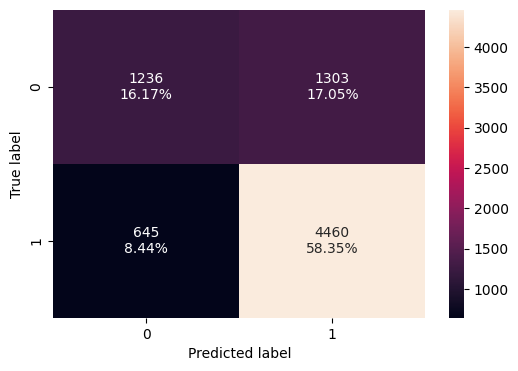

In [50]:
#Calculating different metrics
stacking_classifier_train_perf=model_performance_classification_sklearn(stacking_classifier,X_train,y_train)
print("Training performance:\n",stacking_classifier_train_perf)
stacking_classifier_test_perf=model_performance_classification_sklearn(stacking_classifier,X_test,y_test)
print("Testing performance:\n",stacking_classifier_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(stacking_classifier,X_test,y_test)

## Model Performance Comparison and Conclusions

**Comparing performance for Tuned Models and Stacking Classifier**

In [52]:
# training performance comparison

models_train_comp_df = pd.concat(
[
dtree_class_wgt_tuned_train_perf.T,
bagging_estimator_tuned_train_perf.T,
rf_estimator_tuned_train_perf.T,
abc_estimator_tuned_train_perf.T,
gbc_estimator_tuned_train_perf.T,
xgb_estimator_tuned_train_perf.T,
stacking_classifier_train_perf.T
],axis=1
)

models_train_comp_df.columns = [
    "Decision Tree Tuned",
    "Bagging Classifier Tuned",
    "Random Forest Tuned",
    "Adabosst Classifier Tuned ",
    "Gradient Boost Classifier Tuned",
    "XGBoost Classifier Tuned",
    "Stacking Classifier "
]

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree Tuned,Bagging Classifier Tuned,Random Forest Tuned,Adabosst Classifier Tuned,Gradient Boost Classifier Tuned,XGBoost Classifier Tuned,Stacking Classifier
Accuracy,0.710193,0.998598,0.917975,0.754317,0.760148,0.761942,0.758074
Recall,0.725762,0.999916,0.975153,0.889365,0.891463,0.891799,0.879711
Precision,0.819681,0.997989,0.908714,0.775679,0.780595,0.782269,0.784314
F1,0.769868,0.998952,0.940762,0.828641,0.832354,0.833451,0.829278


In [55]:
# testing performance comparison

models_test_comp_df = pd.concat(
[
dtree_class_wgt_tuned_test_perf.T,
bagging_estimator_tuned_test_perf.T,
rf_estimator_tuned_test_perf.T,
abc_estimator_tuned_test_perf.T,
gbc_estimator_tuned_test_perf.T,
xgb_estimator_tuned_test_perf.T,
stacking_classifier_test_perf.T
],axis=1
)

models_test_comp_df.columns = [
    "Decision Tree Tuned",
    "Bagging Classifier Tuned",
    "Random Forest Tuned",
    "Adabosst Classifier Tuned ",
    "Gradient Boost Classifier Tuned",
    "XGBoost Classifier Tuned",
    "Stacking Classifier "
]

print("Testing performance comparison:")
models_test_comp_df

Testing performance comparison:


,Decision Tree Tuned,Bagging Classifier Tuned,Random Forest Tuned,Adabosst Classifier Tuned,Gradient Boost Classifier Tuned,XGBoost Classifier Tuned,Stacking Classifier
Accuracy,0.707483,0.723312,0.731293,0.740450,0.743721,0.744244,0.745160
Recall,0.726543,0.891283,0.864643,0.881293,0.880313,0.879726,0.873653
Precision,0.815344,0.744681,0.764064,0.765527,0.769257,0.770062,0.773902
F1,0.768386,0.811413,0.811248,0.819341,0.821047,0.821249,0.820758


**Observations**

1. Tuned Decision Tree:

   * Testing F1 Score: 0.7684
   * Balanced recall (0.7265) and precision (0.8153) on testing, but relatively lower compared to other tuned models.
   * Minimal overfitting, with small differences between training and testing metrics.

2. Tuned Bagging Classifier:

   * Testing F1 Score: 0.8114
   * High recall (0.8913) but lower precision (0.7447).
   * Persistent overfitting, as training recall (0.9999) and F1 score (0.9989) are significantly higher than testing.

3. Tuned Random Forest:

  * Testing F1 Score: 0.8112
  * Strong recall (0.8646) and good precision (0.7641).
  * Moderate overfitting with noticeable differences between training and testing metrics.

4. Tuned AdaBoost:

  * Testing F1 Score: 0.8193
  * Balanced recall (0.8813) and precision (0.7655).
  * Minimal overfitting, with small differences between training and testing metrics.

5. Tuned Gradient Boosting:

  * Testing F1 Score: 0.8210
  * High recall (0.8803) and strong precision (0.7693).
  * Minimal overfitting, showing consistent generalization between training and testing metrics.

6. Tuned XGBoost:

   * Testing F1 Score: 0.8212
   * Balanced recall (0.8797) and precision (0.7701).
   * Minimal overfitting, with consistent performance across training and testing.

7. Stacking Classifier:

  * Testing F1 Score: 0.8208
  * Strong recall (0.8737) and high precision (0.7739).
  * Minimal overfitting, showing balanced generalization across metrics.


**Conclusion on Model Selection**

Based on the evaluation criteria and the importance of minimizing both False Negatives and False Positives, F1 Score serves as the primary metric for comparison. Among the top-ranked models—Tuned Gradient Boosting, Tuned XGBoost, and Stacking Classifier—Tuned XGBoost is the most suitable choice.

Reason: It achieves the highest F1 score (0.8212), coupled with strong recall (0.8797) and balanced precision (0.7701). This ensures effective minimization of both False Negatives and False Positives, aligning with the objective of reducing losses due to incorrect predictions.

By selecting Tuned XGBoost, you achieve the best balance between minimizing errors and ensuring consistent generalization across metrics. Furthermore, this aligns with the broader business context of balancing economic contributions and opportunities (minimizing False Negatives) with the quality of the workforce and fairness (minimizing False Positives). This dual focus ensures that both types of errors are addressed effectively, in line with the evaluation criteria. Tuned XGBoost thus emerges as the optimal model for the task.

## Important features of the final model

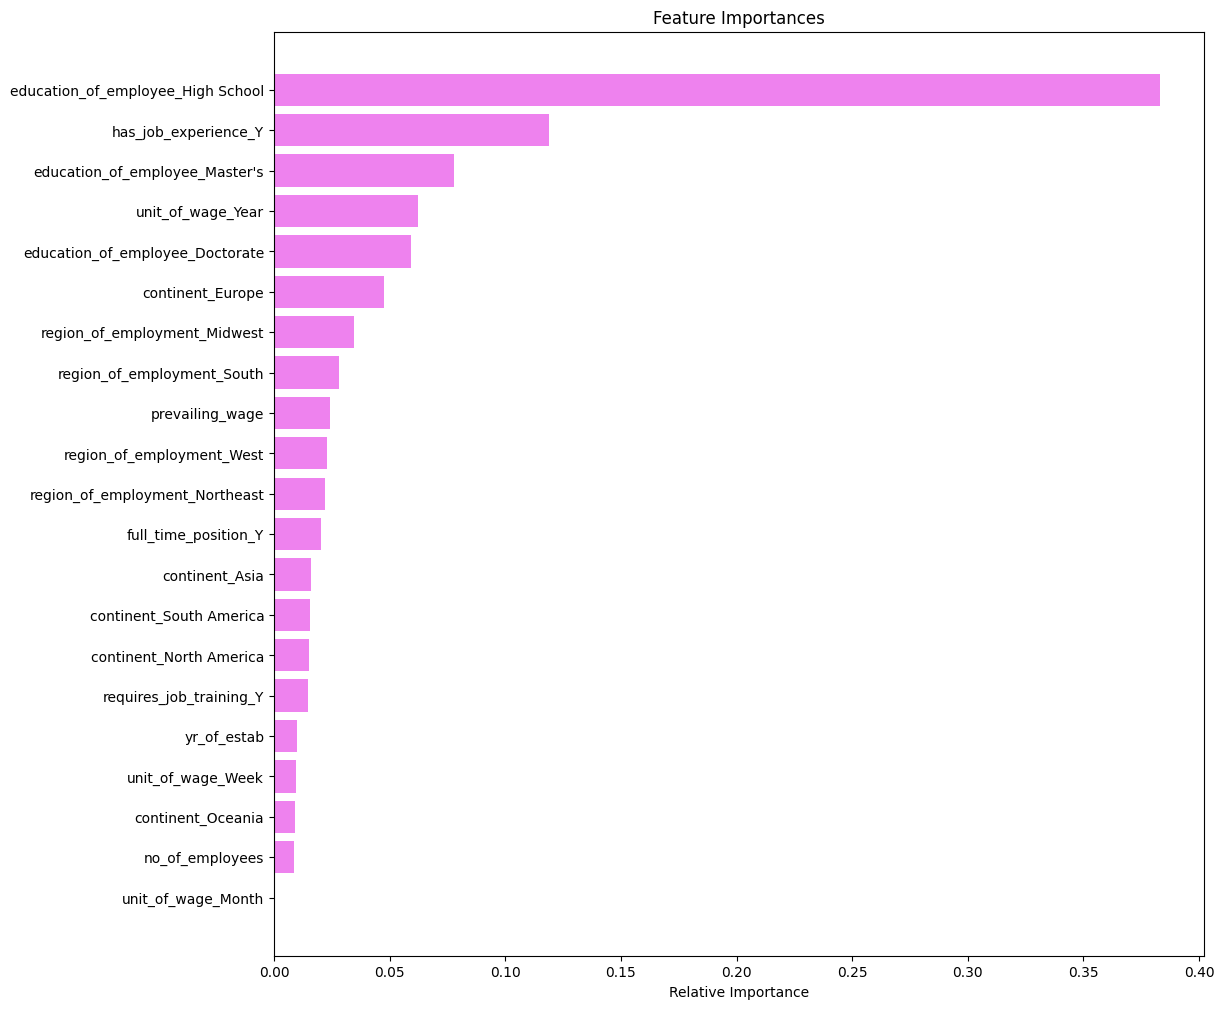

In [56]:
feature_names = X_train.columns
importances = xgb_estimator_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [58]:
print (pd.DataFrame(xgb_estimator_tuned.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by = 'Imp', ascending = False))

                                        Imp
education_of_employee_High School  0.382965
has_job_experience_Y               0.118909
education_of_employee_Master's     0.077909
unit_of_wage_Year                  0.062165
education_of_employee_Doctorate    0.059336
continent_Europe                   0.047561
region_of_employment_Midwest       0.034761
region_of_employment_South         0.027962
prevailing_wage                    0.024071
region_of_employment_West          0.023008
region_of_employment_Northeast     0.022271
full_time_position_Y               0.020267
continent_Asia                     0.016208
continent_South America            0.015416
continent_North America            0.015279
requires_job_training_Y            0.014637
yr_of_estab                        0.010026
unit_of_wage_Week                  0.009347
continent_Oceania                  0.009062
no_of_employees                    0.008840
unit_of_wage_Month                 0.000000


**Feature Importance Analysis**

1. Education of Employee - High School:

  The most influential factor in determining visa certification outcomes. A high feature importance score (0.383) indicates that high school graduates are the most likely to face visa denials. This aligns with the preference for applicants with higher education levels, reflecting employer and regulatory prioritization of skilled labor.

2. Has Job Experience - Yes:

  Job experience is a significant driver (importance: 0.119) of visa approvals. Applicants with prior job experience are more likely to have their visas certified, highlighting the emphasis on proven expertise in the workforce.

3. Education of Employee - Master’s:

  Master’s degree holders have a substantial influence (importance: 0.078) on visa approvals, reflecting the demand for highly educated professionals in the U.S. labor market.

4. Unit of Wage - Yearly:

  The importance of yearly wage roles (importance: 0.062) indicates that applicants with stable, annual compensation structures are viewed more favorably. This could be tied to perceptions of job stability and economic contribution.

5. Education of Employee - Doctorate:

  Doctorate holders show a meaningful impact (importance: 0.059) on visa certification, reinforcing the focus on highly specialized and educated professionals, particularly for high-skill roles.

6. Continent - Europe:

  European applicants hold a moderate influence (importance: 0.048) in visa outcomes. This could indicate regional policy considerations or employer preferences for applicants from Europe.

6. Region of Employment - Midwest:

  The Midwest region (importance: 0.035) reflects specific labor market dynamics or regional economic needs, indicating its role as a moderate driver in visa certification outcomes

The alignment between model-derived feature importance and EDA insights strengthens the validity of the analysis. It highlights key drivers such as education, job experience, pay structures, continent, and US employment regions that consistently influence visa certification outcomes across both exploratory and predictive analyses.

This comprehensive understanding underscores the importance of both individual-level factors (e.g., education and experience) and broader geographic influences (e.g., continents and regions in the US). These insights provide a robust foundation for actionable recommendations while aligning closely with observed data patterns and stakeholder priorities.


## Actionable Insights and Recommendations

Based on the analysis of feature importance, EDA insights, and the overarching objective to optimize visa certification decisions while balancing economic contributions and workforce quality, the following actionable insights and recommendations are proposed:

1. Education as a Key Driver

 Insight:

 * Applicants with advanced degrees (Master’s and Doctorate) are significantly more likely to be certified, as seen in both model importance and EDA. High school graduates face high denial rates, reflecting challenges in meeting qualification standards.

 Recommendations:

 * Educate US employers about the advantages of prioritizing applicants with advanced education levels to improve certification success.
 * Develop outreach programs to target skilled applicants from global talent pools, especially those with Master’s and Doctorate degrees.
 * For high school-level applicants, employers should be encouraged to include additional supporting documents or certifications that demonstrate unique skills or job relevance.

2. Prioritize Job Experience

 Insight:

 * Work experience is a significant factor, with experienced applicants having a higher certification rate (74.5%) compared to those without (56.2%).

 Recommendations:

 * Encourage US employers to highlight job experience as a critical qualification in their applications.
 * For applicants lacking work experience, suggest including internships or other forms of practical exposure to strengthen the case for certification.

3. Regional and Continent-Specific Insights

 Insight:

 * Europe has the highest visa certification rates (79.2%), and applicants from the Midwest region in the US are more likely to succeed (75.5%). Conversely, applicants from South America and those targeting the Island region face higher denial rates.

 Recommendations:

 * Employers hiring from high-certification regions like Europe or Midwest should maintain detailed justifications for hiring choices to streamline approval processes.
 * For applicants from South America or targeting the Island region, applications should include additional supporting evidence to counter regional biases or challenges.

4. Pay Structures Matter

 Insight:

 * Yearly wage jobs are most likely to be certified (69.9%), while hourly wage jobs face significant challenges (34.6%).

 Recommendations:

  * Employers should prioritize offering yearly or monthly wage structures in visa applications where possible.
  * For roles compensated hourly, emphasize other strengths of the applicant, such as unique skills or job relevance, to improve certification chances.

5. Prevailing Wages

 Insight:

 * Applications with prevailing wages in the $40,000 to $120,000 range are strongly associated with certification, while outliers above $200,000 or broader variability are more likely denied.

 Recommendations:

 * Ensure wage offers fall within competitive yet reasonable ranges, aligning with prevailing market rates.
 * High-wage applications should include detailed justifications, demonstrating how the role aligns with specialized skills or critical business needs.

6. Leverage Midwest and Europe Preferences

 Insight:

 * Europe (high certification rate) and the Midwest region (75.5% success) are favorable contexts for visa applications.

 Recommendations:

 * Employers can target hiring from European talent pools and emphasize Midwest-based positions to increase certification success rates.
 * Employers in less favorable regions (e.g., Island region) should include additional evidence to demonstrate the strategic importance of the hire.

7. Employment Type and Training

 Insight:

 * Full-time positions dominate in volume and show consistent success, while training requirements minimally affect certification rates.

 Recommendations:

 * Employers should clearly outline full-time roles in applications and avoid ambiguity regarding employment type.
 * Training requirements, while not heavily influential, should align with job demands to maintain consistency in outcomes.

These recommendations integrate predictive model findings with observed trends from EDA, ensuring they are data-driven and aligned with real-world scenarios. By addressing key drivers and optimizing application strategies, these insights aim to enhance visa certification outcomes effectively.